# **Experiment 4**



## Logistic Regression


### 0. Import Packages

In [ ]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from tqdm import tqdm
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# defining preferences for ConfusionMatrixDisplay

def configure_CM(cm_display, title):
  cm_display.ax_.set_xlabel("Target?")
  cm_display.ax_.set_ylabel("Buys")
  cm_display.ax_.set_xticklabels(["Yes", "No"])
  cm_display.ax_.set_yticklabels(["Yes", "No"])
  cm_display.ax_.set_title(title)

### 1.   Load Dataset

In [ ]:
file_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/df_1%20(1)"

In [ ]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [ ]:
df.describe()

,Unnamed: 0,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
count,131337.00000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,...,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,65668.00000,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,...,0.115390,0.187868,0.023383,0.062184,0.049057,0.007568,0.187350,0.396842,0.000442,0.415367
std,37913.87049,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,...,0.319493,0.390608,0.151116,0.241490,0.215988,0.086667,0.390194,0.489245,0.021010,0.492787
min,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32834.00000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65668.00000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98502.00000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,131336.00000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Unnamed: 0                 131337 non-null  int64
 1   Target                     131337 non-null  int64
 2   age_of_vehicle_years       131337 non-null  int64
 3   sched_serv_warr            131337 non-null  int64
 4   non_sched_serv_warr        131337 non-null  int64
 5   sched_serv_paid            131337 non-null  int64
 6   non_sched_serv_paid        131337 non-null  int64
 7   total_paid_services        131337 non-null  int64
 8   total_services             131337 non-null  int64
 9   mth_since_last_serv        131337 non-null  int64
 10  annualised_mileage         131337 non-null  int64
 11  num_dealers_visited        131337 non-null  int64
 12  num_serv_dealer_purchased  131337 non-null  int64
 13  car_model_model_1          131337 non-null  int64
 14  car_

In [ ]:
df.columns

Index(['Unnamed: 0', 'Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

### 3. Explore Target variable

In [ ]:
target = df['Target']

In [ ]:
target.describe()

count    131337.000000
mean          0.026809
std           0.161525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64

In [ ]:
target_counts = target.value_counts()
target_counts

Target
0    127816
1      3521
Name: count, dtype: int64

In [ ]:
target_imbalance = (target_counts[1] / target_counts[0]).round(2)
print(f"Target Imbalance: {target_imbalance} %")

Target Imbalance: 0.03 %


### 4. Explore Variables of Interest

In [ ]:
# Defining a function to:
#   Calculate a response rate for each unique value in a column
#   Display a barchart showing response rates
#   Take as input: dataframe, column

def respond_and_chart(data, col, target):
  # unique values
  vals = data[col].unique()
  # rr dict
  RRs = {}
  # locate unique vals
  for val in vals:
    rows = data.loc[data[col] == val]
    rr = rows[target].mean()
    # store in a dict
    RRs[val] = rr
  # make and display barchart
  plt.bar(*zip(*RRs.items()))
  plt.xlabel(f"{col}")
  plt.ylabel('Response Rate')
  plt.title(f'Response Rate by {col}')
  plt.show()

  return RRs

In [ ]:
# iterate through cols to find the lowest and highest response rates
# the respond() function returns a dict, with unique values for the col as keys, and rrs as values
# goal is to find:
#   highest and lowest stdev's in rr (how predictive might the col be)
#   highest and lowest mean response rates, determined by summing RRs and dividing by number of unique values

# simplified version of respond without printing:
def respond(data, col, target):
  # unique values
  vals = data[col].unique()
  # rr dict
  RRs = {}
  # locate unique vals
  for val in vals:
    rows = data.loc[data[col] == val]
    rr = rows[target].mean()
    # store in a dict
    RRs[val] = rr
  # find RR stdev
  rr_values = list(RRs.values())
  stdev = np.std(rr_values)
  agg_rr = np.sum(rr_values)
  mean_rr = np.mean(rr_values)
  # add info to df
  # RR_df = pd.DataFrame({
  #     'Variable': [col],
  #     'Stdev': [stdev],
  #     'Mean': [mean_rr],
  #     'Aggregate': [agg_rr]
  # })
  return [col, stdev, mean_rr, agg_rr]

results = []

# call respond() for every col in df
for col in df.columns:
  results.append(respond(df, col, 'Target'))

results_df = pd.DataFrame(results, columns=['Variable', 'Stdev', 'Mean', 'Aggregate'])
results_df

,Variable,Stdev,Mean,Aggregate
0,Unnamed: 0,0.161525,0.026809,3521.000000
1,Target,0.500000,0.500000,1.000000
2,age_of_vehicle_years,0.022659,0.026389,0.263886
3,sched_serv_warr,0.033278,0.026106,0.261058
4,non_sched_serv_warr,0.017314,0.026627,0.266266
5,sched_serv_paid,0.031654,0.026149,0.261489
6,non_sched_serv_paid,0.005360,0.026795,0.267946
7,total_paid_services,0.014883,0.026674,0.266735
8,total_services,0.032850,0.026126,0.261260
9,mth_since_last_serv,0.026203,0.026513,0.265129


Assess feature importances returned from experiment 2

In [ ]:
#results_df.drop(0, inplace=True)
results_df.drop(1, inplace=True)
rr_variance = results_df.sort_values('Stdev', ascending=False)
rr_agg = results_df.sort_values('Aggregate', ascending=False)
rr_mean = results_df.sort_values('Mean', ascending=False)

The table below shows us how much variance there is in the response rate for the values in a column. This is a proxy for the predictive power of the variable (how much response rate changes depending on the value). The lowest stdevs at the bottom of the table show variables whose values have near-identical response rates. These suggest predictors with less predictive power. We can note that the rankings here are similar to the rankings for Feature Importances from Experiment 1.

In [ ]:
rr_variance

,Variable,Stdev,Mean,Aggregate
0,Unnamed: 0,0.161525,0.026809,3521.000000
3,sched_serv_warr,0.033278,0.026106,0.261058
8,total_services,0.032850,0.026126,0.261260
5,sched_serv_paid,0.031654,0.026149,0.261489
9,mth_since_last_serv,0.026203,0.026513,0.265129
2,age_of_vehicle_years,0.022659,0.026389,0.263886
4,non_sched_serv_warr,0.017314,0.026627,0.266266
10,annualised_mileage,0.015474,0.026688,0.266882
7,total_paid_services,0.014883,0.026674,0.266735
17,car_model_model_13,0.013982,0.040639,0.081279


The table below shows us the mean response rate for variables. This information is important, because we do want to bias our models towards capturing as many Positives (1s) as possible (i.e. maximizing Recall score). Variables may have low stdev in rr (meaning variable is not that helpful in classification) but have a relatively high response rate. Feature Importance and stdev rr might tempt us to drop these variables because of the low stdev, but this might perversely make it harder to capture Positives, so long as we instruct our models to weight Positives in proportion to their sparsity in the dataset.

In [ ]:
rr_mean

,Variable,Stdev,Mean,Aggregate
17,car_model_model_13,0.013982,0.040639,0.081279
22,car_model_model_18,0.011357,0.038148,0.076296
25,car_model_model_3,0.007044,0.032021,0.064043
29,car_model_model_7,0.005030,0.031213,0.062427
20,car_model_model_16,0.004143,0.030945,0.061889
30,car_model_model_8,0.003694,0.030141,0.060282
19,car_model_model_15,0.001570,0.028371,0.056741
32,car_segment_LCV,0.002134,0.028143,0.056286
33,car_segment_Large/SUV,0.002445,0.027313,0.054627
13,car_model_model_1,0.000258,0.027007,0.054014


importing Feature Importances from experiment 1

In [ ]:
fi_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/Agg%20FIs%20for%20best%20RFs%20(1)"
FIs = pd.read_csv(fi_url)
FIs.drop('Unnamed: 0', inplace=True, axis=1)
FIs

,Feature,Importance (%) GS,Importance (%) RF30,Importance (%) RF30A,Mean Importance (%)
0,sched_serv_warr,19.52,19.42,19.42,19.45
1,total_services,16.93,18.37,18.37,17.89
2,sched_serv_paid,16.61,16.57,16.57,16.58
3,mth_since_last_serv,16.13,15.82,15.82,15.92
4,age_of_vehicle_years,8.93,9.07,9.07,9.02
5,annualised_mileage,7.58,7.24,7.24,7.35
6,non_sched_serv_warr,3.67,4.03,4.03,3.91
7,total_paid_services,2.79,2.59,2.59,2.66
8,num_dealers_visited,2.75,2.54,2.54,2.61
9,num_serv_dealer_purchased,2.72,2.31,2.31,2.45


In [ ]:
# Defining a regression plot function

sns.set_style('ticks')  # set default plot style
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF',
          '#00FFFF', '#800080', '#008080', '#808000', '#800000']
sns.set_palette(colors)  # set custom color scheme
plt.rcParams['figure.figsize'] = (9, 6)


def regplots(X, y):
    colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF',
              '#00FFFF', '#800080', '#008080', '#808000', '#800000']
    sns.set_palette(colors)  # set custom color scheme

    labels = list(X.columns)

    N, p = X.shape

    rows = int(np.ceil(p / 3))

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows * (11 / 4)))

    if len(X.unique()) > 2:
      xticks = np.arange(1, 10, 1)
    else:
      xticks=[0, 1]

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.regplot(x=X.iloc[:, i], y=y, ci=None, logistic=True, y_jitter=0.05,
                        scatter_kws={'s': 20, 'alpha': .5}, color=colors[i % 10], ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('Target')
            ax.set_yticks(["No", "Yes"])
            ax.set_xticks(xticks)
            ax.set_title(labels[i])
            ax.set_xlim(X.iloc[:, i].min(), X.iloc[:, i].max())
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()

    return fig, axes

In [ ]:
df['sched_serv_warr'].unique()

array([ 2, 10,  8,  9,  4,  1,  3,  7,  5,  6])

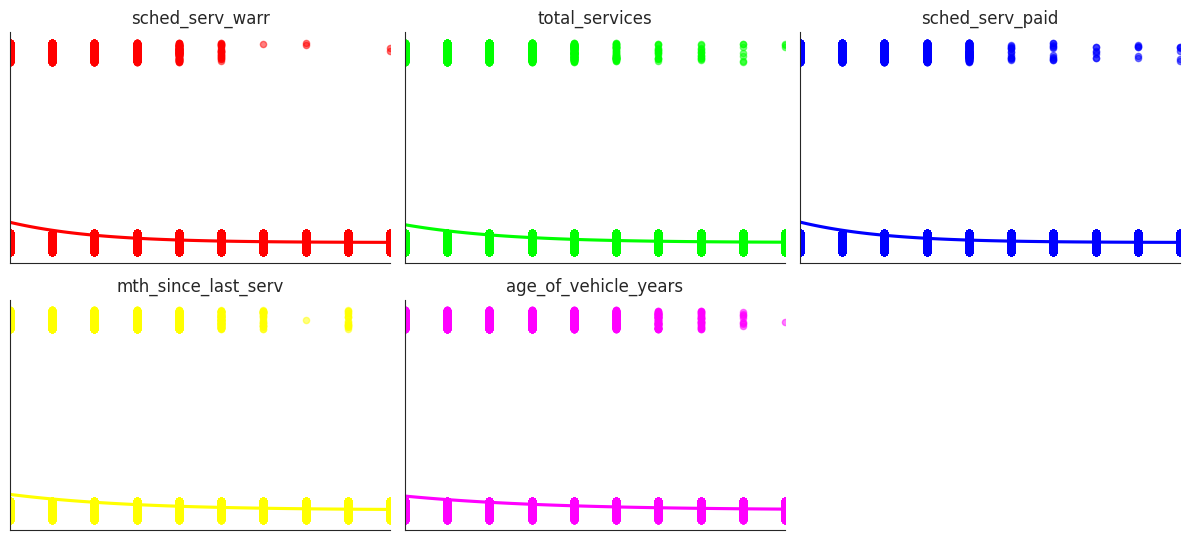

In [ ]:
imp_feats = FIs['Feature'].head()

fig, ax = regplots(df[imp_feats], df['Target'])
plt.show()

### 5. Prepare Data

In [ ]:
df_clean = df.drop('Unnamed: 0', axis=1)

In [ ]:
df_clean.columns

Index(['Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'car_model_model_1', 'car_model_model_10',
       'car_model_model_11', 'car_model_model_12', 'car_model_model_13',
       'car_model_model_14', 'car_model_model_15', 'car_model_model_16',
       'car_model_model_17', 'car_model_model_18', 'car_model_model_19',
       'car_model_model_2', 'car_model_model_3', 'car_model_model_4',
       'car_model_model_5', 'car_model_model_6', 'car_model_model_7',
       'car_model_model_8', 'car_model_model_9', 'car_segment_LCV',
       'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

### 6. Split Dataset

importing splits from experiment 1

In [ ]:
X_train_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_train_1"
X_val_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_val_1"
X_test_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/X_test_1"

y_train_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_train_1"
y_val_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_val_1"
y_test_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/y_test_1"

X_train = pd.read_csv(X_train_url)
X_val = pd.read_csv(X_val_url)
X_test = pd.read_csv(X_test_url)

y_train = pd.read_csv(y_train_url)
y_val = pd.read_csv(y_val_url)
y_test = pd.read_csv(y_test_url)

In [ ]:
datasets = [X_train, X_val, X_test, y_train, y_val, y_test]

# restoring original indices

for dataset in datasets:
  dataset.set_index('Unnamed: 0', inplace=True, verify_integrity=True)
  print(dataset.columns)
  print("")

Index(['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'car_model_model_1',
       'car_model_model_10', 'car_model_model_11', 'car_model_model_12',
       'car_model_model_13', 'car_model_model_14', 'car_model_model_15',
       'car_model_model_16', 'car_model_model_17', 'car_model_model_18',
       'car_model_model_19', 'car_model_model_2', 'car_model_model_3',
       'car_model_model_4', 'car_model_model_5', 'car_model_model_6',
       'car_model_model_7', 'car_model_model_8', 'car_model_model_9',
       'car_segment_LCV', 'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

Index(['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',

In [ ]:
y_train = y_train['Target']
y_val = y_val['Target']
y_test = y_test['Target']

In [ ]:
for dataset in datasets:
  dataset.index.rename("Index", inplace=True)
  print(dataset.head().index)
  print(dataset.tail().index)
  print("")

Index([62240, 57864, 108896, 19747, 58454], dtype='int64', name='Index')
Index([21568, 121526, 99055, 86959, 69655], dtype='int64', name='Index')

Index([78749, 124225, 89057, 117989, 33437], dtype='int64', name='Index')
Index([97691, 81229, 6043, 92109, 67129], dtype='int64', name='Index')

Index([20850, 119184, 33941, 39776, 14297], dtype='int64', name='Index')
Index([69096, 68154, 18628, 110337, 112250], dtype='int64', name='Index')

Index([62240, 57864, 108896, 19747, 58454], dtype='int64', name='Index')
Index([21568, 121526, 99055, 86959, 69655], dtype='int64', name='Index')

Index([78749, 124225, 89057, 117989, 33437], dtype='int64', name='Index')
Index([97691, 81229, 6043, 92109, 67129], dtype='int64', name='Index')

Index([20850, 119184, 33941, 39776, 14297], dtype='int64', name='Index')
Index([69096, 68154, 18628, 110337, 112250], dtype='int64', name='Index')



In [ ]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

Target
0    81801
1     2254
Name: count, dtype: int64
Target
0    20451
1      563
Name: count, dtype: int64
Target
0    25564
1      704
Name: count, dtype: int64


In [ ]:
# import feature importances from experiment 1 to refine X

FI_url = "https://raw.githubusercontent.com/karlcatsky/MLAA-Assignment-2/main/Agg%20FIs%20for%20best%20RFs%20(1)"
FIs = pd.read_csv(FI_url)
FIs.drop('Unnamed: 0', axis=1, inplace=True)
FIs.head(20)

,Feature,Importance (%) GS,Importance (%) RF30,Importance (%) RF30A,Mean Importance (%)
0,sched_serv_warr,19.52,19.42,19.42,19.45
1,total_services,16.93,18.37,18.37,17.89
2,sched_serv_paid,16.61,16.57,16.57,16.58
3,mth_since_last_serv,16.13,15.82,15.82,15.92
4,age_of_vehicle_years,8.93,9.07,9.07,9.02
5,annualised_mileage,7.58,7.24,7.24,7.35
6,non_sched_serv_warr,3.67,4.03,4.03,3.91
7,total_paid_services,2.79,2.59,2.59,2.66
8,num_dealers_visited,2.75,2.54,2.54,2.61
9,num_serv_dealer_purchased,2.72,2.31,2.31,2.45


In [ ]:
imp_feats = FIs['Feature'].iloc[0:11]
imp_feats.values

array(['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid'], dtype=object)

X2 is the selective featureset based on Feature Importance analysis from previous experiments

In [ ]:
X2_train = X_train[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

X2_val = X_val[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

X2_test = X_test[['sched_serv_warr', 'total_services', 'sched_serv_paid',
       'mth_since_last_serv', 'age_of_vehicle_years',
       'annualised_mileage', 'non_sched_serv_warr', 'total_paid_services',
       'num_dealers_visited', 'num_serv_dealer_purchased',
       'non_sched_serv_paid']]

In [ ]:
X2_train

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
62240,6,7,9,6,10,4,8,10,10,7,10
57864,7,7,7,9,5,6,8,4,3,8,4
108896,10,9,10,3,8,9,7,9,8,9,6
19747,10,10,10,5,7,10,10,10,10,4,9
58454,9,9,9,4,8,9,9,6,7,10,4
...,...,...,...,...,...,...,...,...,...,...,...
21568,10,10,10,4,10,10,10,10,10,5,10
121526,4,2,5,8,6,4,3,3,3,2,3
99055,1,1,1,1,1,1,2,2,2,2,2


In [ ]:
X2_val

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
78749,4,3,4,3,2,5,4,6,8,5,7
124225,3,6,5,9,9,7,8,5,9,4,6
89057,10,8,10,8,7,9,6,10,9,5,9
117989,6,7,7,9,5,6,8,10,7,9,10
33437,8,9,9,6,10,9,9,8,5,2,6
...,...,...,...,...,...,...,...,...,...,...,...
97691,5,5,7,5,4,8,6,9,6,7,9
81229,10,10,10,3,7,10,7,9,5,10,8
6043,5,5,9,10,10,7,5,6,6,3,4


In [ ]:
X2_test

,sched_serv_warr,total_services,sched_serv_paid,mth_since_last_serv,age_of_vehicle_years,annualised_mileage,non_sched_serv_warr,total_paid_services,num_dealers_visited,num_serv_dealer_purchased,non_sched_serv_paid
Index,,,,,,,,,,,
20850,7,10,5,6,6,10,10,8,9,10,9
119184,10,8,8,3,5,9,2,5,8,9,2
33941,10,7,8,4,6,10,2,5,3,2,3
39776,4,4,3,4,3,4,4,3,7,5,4
14297,1,1,2,1,4,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
69096,5,6,7,5,5,7,7,10,4,7,10
68154,6,7,5,6,8,7,9,9,10,8,10
18628,7,9,8,6,5,8,10,10,3,2,10


Feature scaling using MinMax.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### 7. Baseline Model

In [ ]:
# initializing lists for storing metrics and results

# models
model_names_list = []

# hyperpameters
penalties = []
weights = []
C_list = []
solvers = []

# training metrics
training_accuracy_list = []
training_precision_list = []
training_recall_list = []
training_f1_list = []
training_f2_list = []
training_f3_list = []
training_f4_list = []
training_f10_list = []

# validation metrics
validation_accuracy_list = []
validation_precision_list = []
validation_recall_list = []
validation_f1_list = []
validation_f2_list = []
validation_f3_list = []
validation_f4_list = []
validation_f10_list = []

# generalization gain
accuracy_losses_list = []
precision_losses_list = []
recall_losses_list = []
f1_losses_list = []
f2_losses_list = []
f3_losses_list = []
f4_losses_list = []
f10_losses_list = []

# confusion matrices
cm_train_list = []
cm_val_list = []

In [ ]:
X_train

,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
Index,,,,,,,,,,,,,,,,,,,,,
62240,1.000000,0.555556,0.777778,0.888889,1.000000,1.000000,0.666667,0.555556,0.333333,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57864,0.444444,0.666667,0.777778,0.666667,0.333333,0.333333,0.666667,0.888889,0.555556,0.222222,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
108896,0.777778,1.000000,0.666667,1.000000,0.555556,0.888889,0.888889,0.222222,0.888889,0.777778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19747,0.666667,1.000000,1.000000,1.000000,0.888889,1.000000,1.000000,0.444444,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58454,0.777778,0.888889,0.888889,0.888889,0.333333,0.555556,0.888889,0.333333,0.888889,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121526,0.555556,0.333333,0.222222,0.444444,0.222222,0.222222,0.111111,0.777778,0.333333,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99055,0.000000,0.000000,0.111111,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
base_train = np.full(y_train.shape, 0)
base_val = np.full(y_val.shape, 0)

In [ ]:
train_perf = y_train
valid_perf = y_val
test_perf = y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

Training results: 

Accuracy of Baseline Model:  0.9731842246148356
Precision of Baseline Model:  0.0
Recall of Baseline Model:  0.0
F1 Score of Baseline Model:  0.0
F2 Score of Baseline Model:  0.0
F3 Score of Baseline Model:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F4 Score of Baseline Model:  0.0
F10 Score of Baseline Model:  0.0
[[    0  2254]
 [    0 81801]]

Validation Results: 

Accuracy of Baseline Model:  0.9732083372989435
Precision of Baseline Model:  0.0
Recall of Baseline Model:  0.0
F1 Score of Baseline Model:  0.0
F2 Score of Baseline Model:  0.0
F3 Score of Baseline Model:  0.0
F4 Score of Baseline Model:  0.0
F10 Score of Baseline Model:  0.0
[[    0   563]
 [    0 20451]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


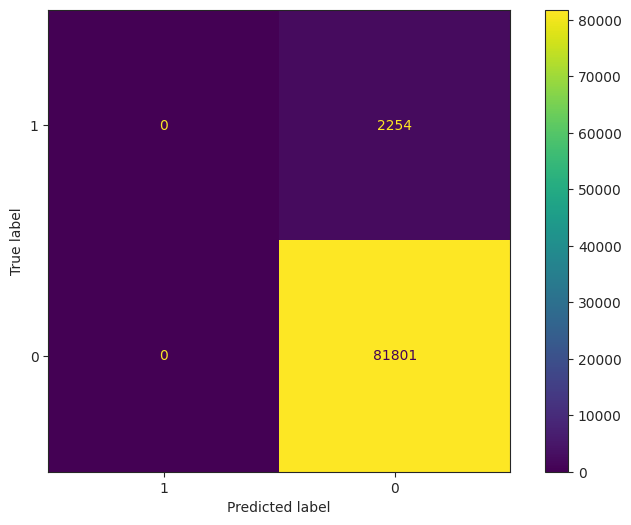

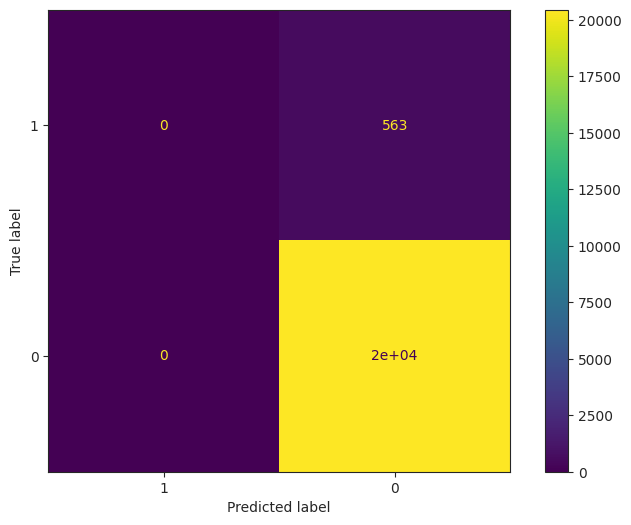

In [ ]:
print("Training results: ")
print("")

accuracy_base_train = accuracy_score(y_train, base_train)
print("Accuracy of Baseline Model: ", accuracy_base_train)

precision_base_train = precision_score(y_train, base_train, labels=[1, 0])
print("Precision of Baseline Model: ", precision_base_train)

recall_base_train = recall_score(y_train, base_train, labels=[1, 0])
print("Recall of Baseline Model: ", recall_base_train)

f1_base_train = f1_score(y_train, base_train, labels=[1, 0])
print("F1 Score of Baseline Model: ", f1_base_train)

f2_base_train = fbeta_score(y_train, base_train, beta=2, labels=[1,0])
print("F2 Score of Baseline Model: ", f2_base_train)

f3_base_train = fbeta_score(y_train, base_train, beta=3, labels=[1,0])
print("F3 Score of Baseline Model: ", f3_base_train)

f4_base_train = fbeta_score(y_train, base_train, beta=4, labels=[1,0])
print("F4 Score of Baseline Model: ", f4_base_train)

f10_base_train = fbeta_score(y_train, base_train, beta=3, labels=[1,0])
print("F10 Score of Baseline Model: ", f3_base_train)

cm_base_train = confusion_matrix(y_train, base_train, labels=[1, 0])
print(cm_base_train)

print("")
print("Validation Results: ")
print("")
accuracy_base_val = accuracy_score(y_val, base_val)
print("Accuracy of Baseline Model: ", accuracy_base_val)

precision_base_val = precision_score(y_val, base_val, labels=[1, 0])
print("Precision of Baseline Model: ", precision_base_val)

recall_base_val = recall_score(y_val, base_val, labels=[1, 0])
print("Recall of Baseline Model: ", recall_base_val)

f1_base_val = f1_score(y_val, base_val, labels=[1, 0])
print("F1 Score of Baseline Model: ", f1_base_val)

f2_base_val = fbeta_score(y_val, base_val, beta=2, labels=[1,0])
print("F2 Score of Baseline Model: ", f2_base_val)

f3_base_val = fbeta_score(y_val, base_val, beta=3, labels=[1,0])
print("F3 Score of Baseline Model: ", f3_base_val)

f4_base_val = fbeta_score(y_val, base_val, beta=4, labels=[1,0])
print("F4 Score of Baseline Model: ", f4_base_val)

f10_base_val = fbeta_score(y_val, base_val, beta=10, labels=[1,0])
print("F10 Score of Baseline Model: ", f10_base_val)

cm_base_val = confusion_matrix(y_val, base_val, labels=[1, 0])
print(cm_base_val)

accuracy_base_loss = accuracy_base_train - accuracy_base_val
precision_base_loss = precision_base_train - precision_base_val
recall_base_loss = recall_base_train - recall_base_val
f1_base_loss = f1_base_train - f1_base_val
f2_base_loss = f2_base_train - f2_base_val
f3_base_loss = f3_base_train - f3_base_val
f4_base_loss = f4_base_train - f4_base_val
f10_base_loss = f10_base_train - f10_base_val

# appending to lists

model_names_list.append("Baseline")
C_list.append(None)
penalties.append(None)
weights.append(None)
solvers.append(None)

training_accuracy_list.append(accuracy_base_train)
training_precision_list.append(precision_base_train)
training_recall_list.append(recall_base_train)
training_f1_list.append(f1_base_train)
training_f2_list.append(f2_base_train)
training_f3_list.append(f3_base_train)
training_f4_list.append(f4_base_train)
training_f10_list.append(f10_base_train)

validation_accuracy_list.append(accuracy_base_val)
validation_precision_list.append(precision_base_val)
validation_recall_list.append(recall_base_val)
validation_f1_list.append(f1_base_val)
validation_f2_list.append(f2_base_val)
validation_f3_list.append(f3_base_val)
validation_f4_list.append(f4_base_val)
validation_f10_list.append(f10_base_val)

accuracy_losses_list.append(accuracy_base_loss)
precision_losses_list.append(precision_base_loss)
recall_losses_list.append(recall_base_loss)
f1_losses_list.append(f1_base_loss)
f2_losses_list.append(f2_base_loss)
f3_losses_list.append(f3_base_loss)
f4_losses_list.append(f4_base_loss)
f10_losses_list.append(f10_base_loss)

cm_train_list.append(cm_base_train)
cm_val_list.append(cm_base_val)

ConfusionMatrixDisplay.from_predictions(y_train, base_train, labels=[1, 0])
ConfusionMatrixDisplay.from_predictions(y_val, base_val, labels=[1, 0])

### 8. Train Logistic Regressors

In [ ]:
# defining a function to generate an Extra Trees model and store results to lists
# this version of the function uses the selective featureset X2 as the default

from sklearn.linear_model import LogisticRegression

def regress_log(name, X_train=X2_train, X_val=X2_val, penalty='l2', C=1.0, class_weight=None, solver='lbfgs', max_iter=100, warm_start=False, l1_ratio=None):
  # instantiating model with specified hyperparameters
  model = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, solver=solver, max_iter=max_iter, random_state=1917, warm_start=warm_start, l1_ratio=l1_ratio)
  # fitting model
  model.fit(X_train, y_train)
  # training results
  preds_train = model.predict(X_train)
  accuracy_train = accuracy_score(y_train, preds_train)
  precision_train = precision_score(y_train, preds_train, labels=[1, 0])
  recall_train = recall_score(y_train, preds_train, labels=[1, 0])
  f1_train = f1_score(y_train, preds_train, labels=[1, 0])
  f2_train = fbeta_score(y_train, preds_train, beta=2, labels=[1, 0])
  f3_train = fbeta_score(y_train, preds_train, beta=3, labels=[1, 0])
  f4_train = fbeta_score(y_train, preds_train, beta=4, labels=[1, 0])
  f10_train = fbeta_score(y_train, preds_train, beta=10, labels=[1, 0])

  # validation results
  preds_val = model.predict(X_val)
  accuracy_val = accuracy_score(y_val, preds_val)
  precision_val = precision_score(y_val, preds_val, labels=[1, 0])
  recall_val = recall_score(y_val, preds_val, labels=[1, 0])
  f1_val = f1_score(y_val, preds_val, labels=[1, 0])
  f2_val = fbeta_score(y_val, preds_val, beta=2, labels=[1, 0])
  f3_val = fbeta_score(y_val, preds_val, beta=3, labels=[1, 0])
  f4_val = fbeta_score(y_val, preds_val, beta=4, labels=[1, 0])
  f10_val = fbeta_score(y_val, preds_val, beta=10, labels=[1, 0])

  # Generalization loss
  accuracy_loss = accuracy_train - accuracy_val
  precision_loss = precision_train - precision_val
  recall_loss = recall_train - recall_val
  f1_loss = f1_train - f1_val
  f2_loss = f2_train - f2_val
  f3_loss = f3_train - f2_val
  f4_loss = f4_train - f4_val
  f10_loss = f10_train - f10_val

  # Storing info in lists

  # appending parameters
  model_names_list.append(name)
  penalties.append(penalty)
  C_list.append(C)
  weights.append(class_weight)
  solvers.append(solver)

  # appending training metrics
  training_accuracy_list.append(accuracy_train)
  training_precision_list.append(precision_train)
  training_recall_list.append(recall_train)
  training_f1_list.append(f1_train)
  training_f2_list.append(f2_train)
  training_f3_list.append(f3_train)
  training_f4_list.append(f4_train)
  training_f10_list.append(f10_train)

  # appending validation metrics
  validation_accuracy_list.append(accuracy_val)
  validation_precision_list.append(precision_val)
  validation_recall_list.append(recall_val)
  validation_f1_list.append(f1_val)
  validation_f2_list.append(f2_val)
  validation_f3_list.append(f3_val)
  validation_f4_list.append(f4_val)
  validation_f10_list.append(f10_val)

  # appending generalization margins
  accuracy_losses_list.append(accuracy_loss)
  precision_losses_list.append(precision_loss)
  recall_losses_list.append(recall_loss)
  f1_losses_list.append(f1_loss)
  f2_losses_list.append(f2_loss)
  f3_losses_list.append(f3_loss)
  f4_losses_list.append(f4_loss)
  f10_losses_list.append(f10_loss)

  # Printing key measures
  print(f"Results for {name}")
  print("   On Training Data:")
  print("     Accuracy: %", (accuracy_train * 100).round(3))
  print("     Precision: %", (precision_train * 100).round(3))
  print("     Recall: %", (recall_train * 100).round(3))
  # print("     F1 Score: ", f1_train)
  # print("     F2 Score: ", f2_train)
  # print("     F3 Score: ", f3_train)
  print("     F4 Score: %", (f4_train * 100).round(3))
  print("     F10 Score: %", (f10_train * 100).round(3))
  print("   On Validation Data:")
  print("     Accuracy: %", (accuracy_val * 100).round(3))
  print("     Precision: %", (precision_val * 100).round(3))
  print("     Recall: %", (recall_val * 100).round(3))
  # print("     F1 Score: ", f1_val)
  # print("     F2 Score: ", f2_val)
  # print("     F3 Score: ", f3_val)
  print("     F4 Score: %", (f3_val * 100).round(3))
  print("     F10 Score: %", (f10_val * 100).round(3))
  print("")
  print("   Generalization Losses:")
  print("     Accuracy: %", (accuracy_loss * 100).round(3))
  print("     Precision: %", (precision_loss * 100).round(3))
  print("     Recall: %", (recall_loss * 100).round(3))
  # print(f"F1 Generalization Loss for {name}: ", f1_loss)
  print("     F4: %", (f4_loss * 100).round(3))
  print("     F10: %", (f10_loss * 100).round(3))
  print("")
  # Confusion Matrices
  cm_train = confusion_matrix(y_train, preds_train, labels=[1, 0])
  cm_val = confusion_matrix(y_val, preds_val, labels=[1, 0])
  cm_train_list.append(cm_train)
  cm_val_list.append(cm_val)

  print("   Confusion Matrices")
  print("")
  print("     Training:")
  print(cm_train)
  print("")
  print("     Validation:")
  print(cm_val)

  train_CM = ConfusionMatrixDisplay.from_predictions(y_train, preds_train, labels=[1, 0])
  configure_CM(train_CM, f"{name} Confusion Matrix on Training Data")
  plt.show()

  val_CM = ConfusionMatrixDisplay.from_predictions(y_val, preds_val, labels=[1, 0])
  configure_CM(val_CM, f"{name} Confusion Matrix on Validation Data")
  plt.show()
  # return model
  return model

default model with comprehensive featureset X

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR_def
   On Training Data:
     Accuracy: % 97.804
     Precision: % 84.932
     Recall: % 22.005
     F4 Score: % 23.008
     F10 Score: % 22.168
   On Validation Data:
     Accuracy: % 97.744
     Precision: % 81.119
     Recall: % 20.604
     F4 Score: % 22.265
     F10 Score: % 20.757

   Generalization Losses:
     Accuracy: % 0.059
     Precision: % 3.813
     Recall: % 1.401
     F4: % 1.459
     F10: % 1.411

   Confusion Matrices

     Training:
[[  496  1758]
 [   88 81713]]

     Validation:
[[  116   447]
 [   27 20424]]


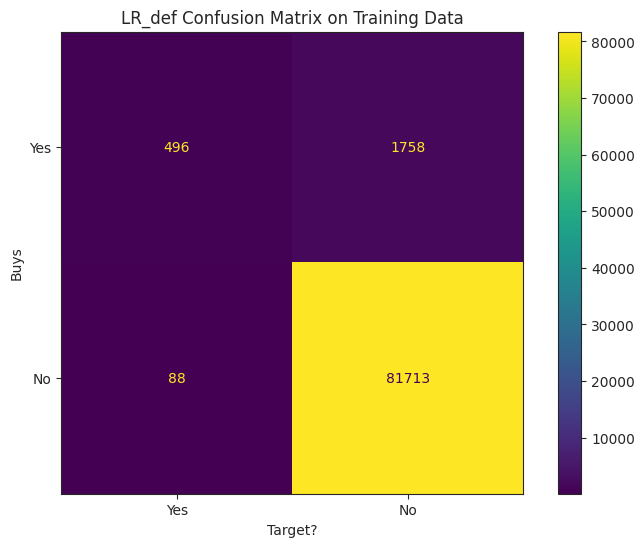

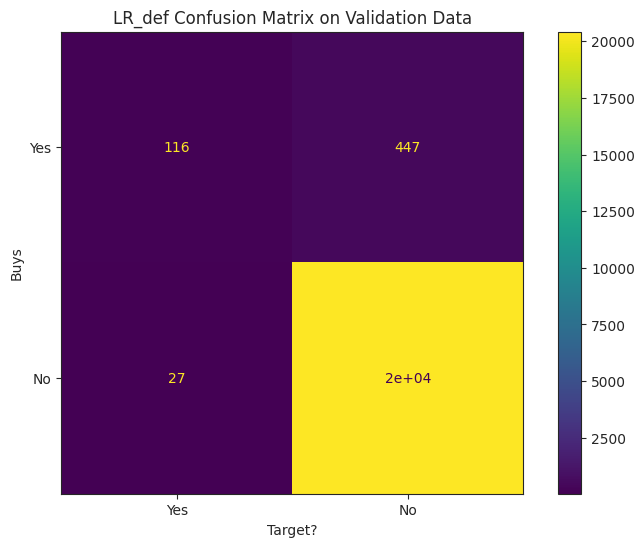

In [ ]:
LR_def = regress_log("LR_def", X_train=X_train, X_val=X_val)

Convergence failure. Could increase max_iter, and/or try 'sag' or 'saga' solver.

Results for LR_def1
   On Training Data:
     Accuracy: % 97.801
     Precision: % 84.88
     Recall: % 21.917
     F4 Score: % 22.917
     F10 Score: % 22.079
   On Validation Data:
     Accuracy: % 97.74
     Precision: % 80.556
     Recall: % 20.604
     F4 Score: % 22.261
     F10 Score: % 20.757

   Generalization Losses:
     Accuracy: % 0.062
     Precision: % 4.324
     Recall: % 1.313
     F4: % 1.369
     F10: % 1.322

   Confusion Matrices

     Training:
[[  494  1760]
 [   88 81713]]

     Validation:
[[  116   447]
 [   28 20423]]


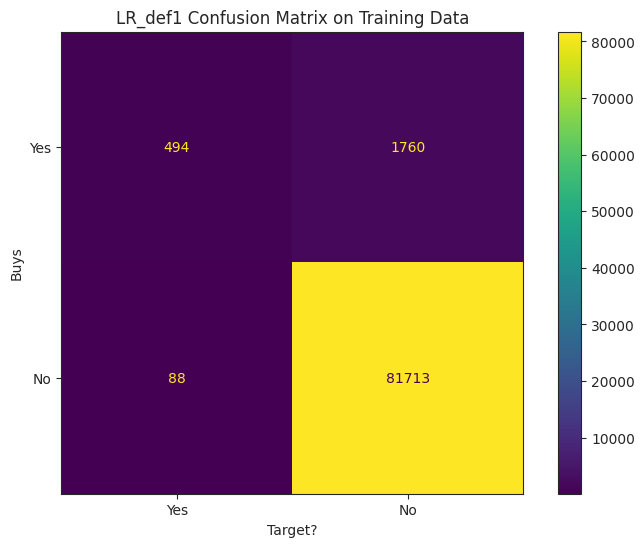

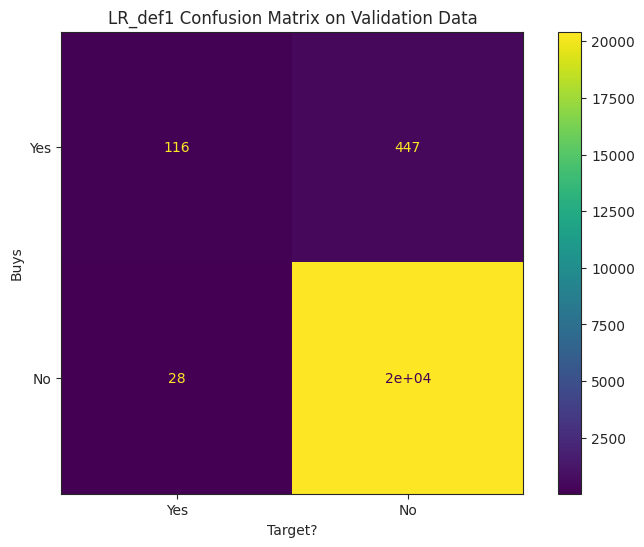

In [ ]:
LR_def1 = regress_log("LR_def1", X_train=X_train, X_val=X_val, max_iter=1000)

convergence succeeds with max-iter=1000

Results for LR_saga
   On Training Data:
     Accuracy: % 97.803
     Precision: % 84.906
     Recall: % 21.961
     F4 Score: % 22.962
     F10 Score: % 22.123
   On Validation Data:
     Accuracy: % 97.74
     Precision: % 80.556
     Recall: % 20.604
     F4 Score: % 22.261
     F10 Score: % 20.757

   Generalization Losses:
     Accuracy: % 0.063
     Precision: % 4.35
     Recall: % 1.357
     F4: % 1.415
     F10: % 1.366

   Confusion Matrices

     Training:
[[  495  1759]
 [   88 81713]]

     Validation:
[[  116   447]
 [   28 20423]]


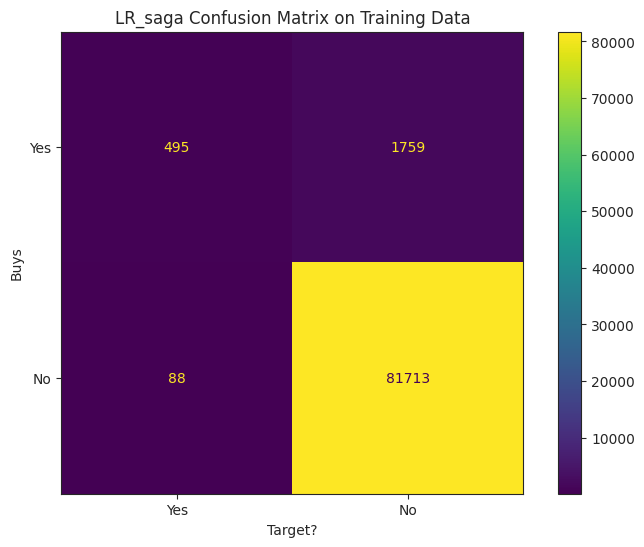

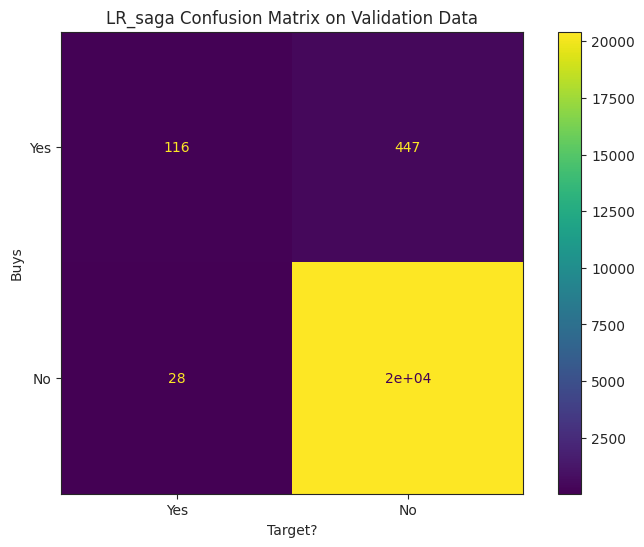

In [ ]:
LR_saga = regress_log("LR_saga", X_train=X_train, X_val=X_val, solver='saga')

'saga' solver converges even with default max_iter of 100

In [ ]:
train_target_counts = y_train.value_counts()
train_pos_ratio = (train_target_counts[1] / train_target_counts[0]) * 100
print(train_pos_ratio)

2.755467537071674


In [ ]:
X_train.columns

Index(['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'car_model_model_1',
       'car_model_model_10', 'car_model_model_11', 'car_model_model_12',
       'car_model_model_13', 'car_model_model_14', 'car_model_model_15',
       'car_model_model_16', 'car_model_model_17', 'car_model_model_18',
       'car_model_model_19', 'car_model_model_2', 'car_model_model_3',
       'car_model_model_4', 'car_model_model_5', 'car_model_model_6',
       'car_model_model_7', 'car_model_model_8', 'car_model_model_9',
       'car_segment_LCV', 'car_segment_Large/SUV', 'car_segment_Other',
       'car_segment_Small/Medium'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Results for LR_balanced_saga
   On Training Data:
     Accuracy: % 76.551
     Precision: % 9.204
     Recall: % 87.356
     F4 Score: % 58.256
     F10 Score: % 80.581
   On Validation Data:
     Accuracy: % 76.287
     Precision: % 9.044
     Recall: % 86.679
     F4 Score: % 46.641
     F10 Score: % 79.888

   Generalization Losses:
     Accuracy: % 0.264
     Precision: % 0.16
     Recall: % 0.677
     F4: % 0.661
     F10: % 0.692

   Confusion Matrices

     Training:
[[ 1969   285]
 [19425 62376]]

     Validation:
[[  488    75]
 [ 4908 15543]]


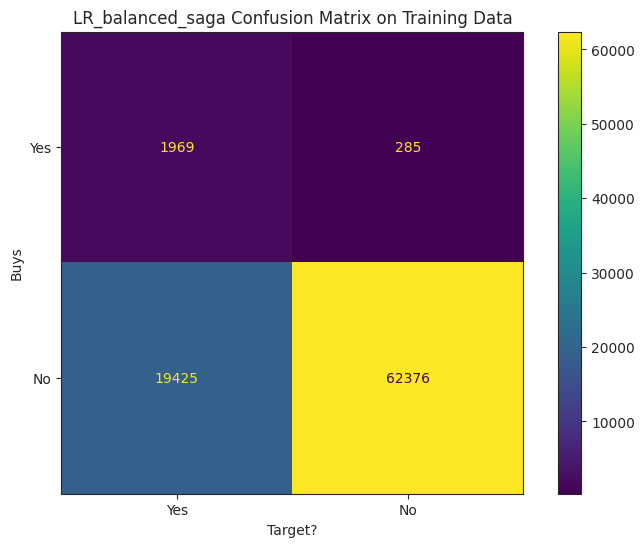

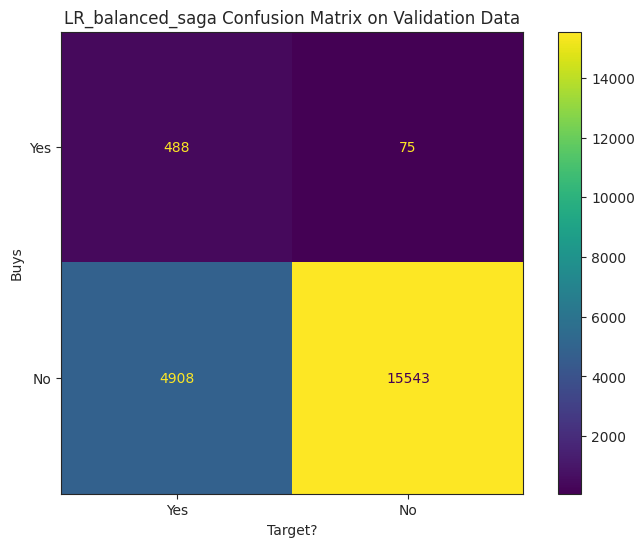

In [ ]:
LR_balanced_saga = regress_log("LR_balanced_saga", X_train=X_train, X_val=X_val, solver='saga', class_weight='balanced')

increasing max_iter

Results for LR_balanced_saga_1
   On Training Data:
     Accuracy: % 77.23
     Precision: % 9.425
     Recall: % 87.001
     F4 Score: % 58.619
     F10 Score: % 80.445
   On Validation Data:
     Accuracy: % 76.863
     Precision: % 9.251
     Recall: % 86.679
     F4 Score: % 47.186
     F10 Score: % 80.045

   Generalization Losses:
     Accuracy: % 0.367
     Precision: % 0.174
     Recall: % 0.322
     F4: % 0.536
     F10: % 0.399

   Confusion Matrices

     Training:
[[ 1961   293]
 [18846 62955]]

     Validation:
[[  488    75]
 [ 4787 15664]]


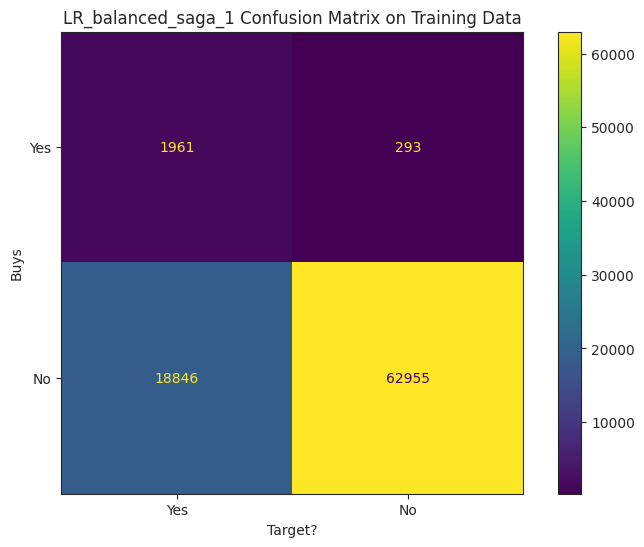

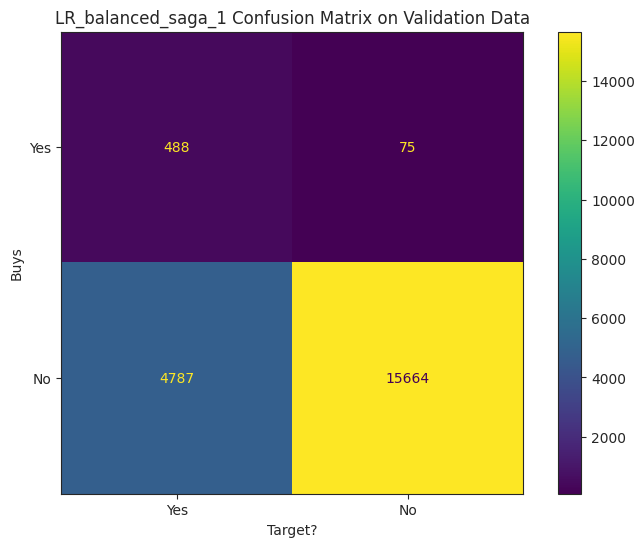

In [ ]:
LR_balanced_saga_1 = regress_log("LR_balanced_saga_1", X_train=X_train, X_val=X_val, C=0.1, solver='saga', max_iter=1000, class_weight='balanced', warm_start=True)

Results for LR_balanced_saga_1a
   On Training Data:
     Accuracy: % 77.335
     Precision: % 9.441
     Recall: % 86.735
     F4 Score: % 58.542
     F10 Score: % 80.231
   On Validation Data:
     Accuracy: % 76.972
     Precision: % 9.261
     Recall: % 86.323
     F4 Score: % 47.116
     F10 Score: % 79.752

   Generalization Losses:
     Accuracy: % 0.363
     Precision: % 0.181
     Recall: % 0.411
     F4: % 0.588
     F10: % 0.479

   Confusion Matrices

     Training:
[[ 1955   299]
 [18752 63049]]

     Validation:
[[  486    77]
 [ 4762 15689]]


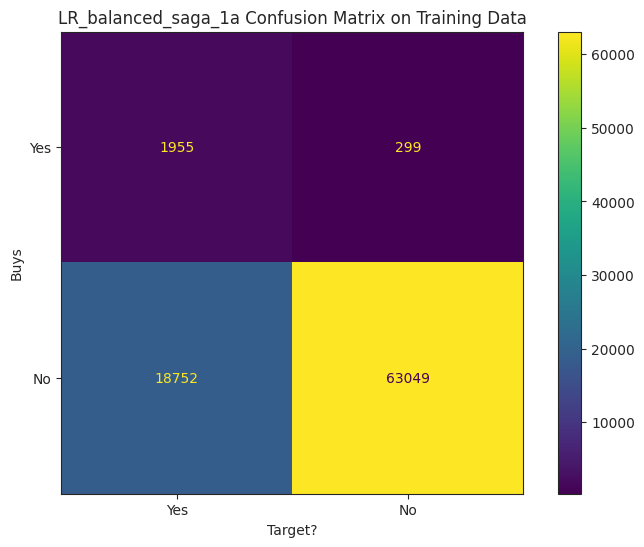

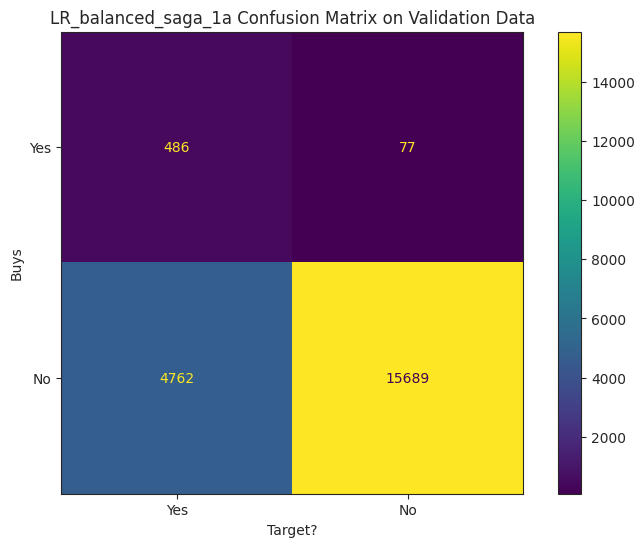

In [ ]:
LR_balanced_saga_1a = regress_log("LR_balanced_saga_1a", X_train=X_train, X_val=X_val, C=0.5, solver='saga', max_iter=1000, class_weight='balanced', warm_start=True)

Results for LR_balanced_saga_1b
   On Training Data:
     Accuracy: % 77.089
     Precision: % 9.387
     Recall: % 87.178
     F4 Score: % 58.607
     F10 Score: % 80.567
   On Validation Data:
     Accuracy: % 76.673
     Precision: % 9.182
     Recall: % 86.679
     F4 Score: % 47.004
     F10 Score: % 79.994

   Generalization Losses:
     Accuracy: % 0.416
     Precision: % 0.205
     Recall: % 0.5
     F4: % 0.686
     F10: % 0.574

   Confusion Matrices

     Training:
[[ 1965   289]
 [18969 62832]]

     Validation:
[[  488    75]
 [ 4827 15624]]


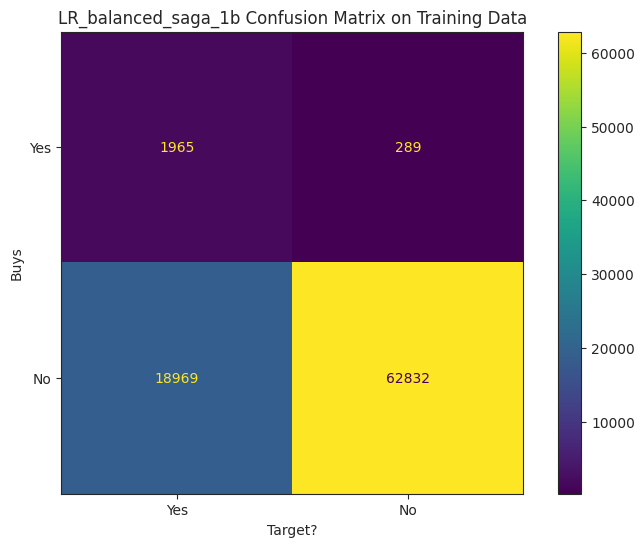

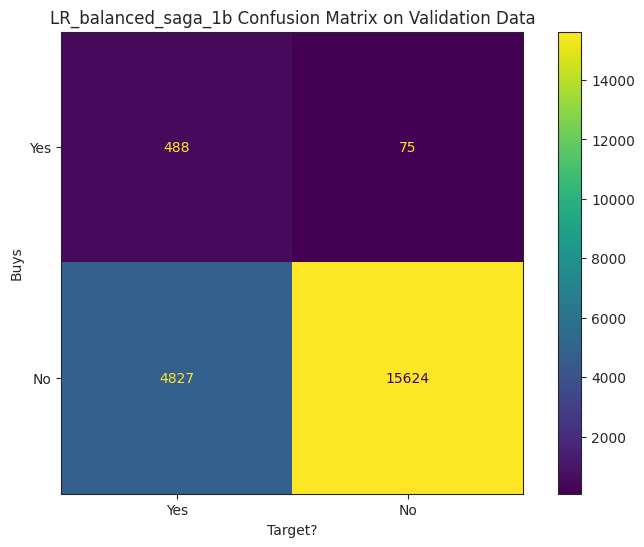

In [ ]:
LR_balanced_saga_1b = regress_log("LR_balanced_saga_1b", X_train=X_train, X_val=X_val, C=0.05, solver='saga', max_iter=1000, class_weight='balanced', warm_start=True)

Results for LR_balanced_saga_1c
   On Training Data:
     Accuracy: % 77.305
     Precision: % 9.434
     Recall: % 86.779
     F4 Score: % 58.544
     F10 Score: % 80.264
   On Validation Data:
     Accuracy: % 76.949
     Precision: % 9.267
     Recall: % 86.501
     F4 Score: % 47.181
     F10 Score: % 79.907

   Generalization Losses:
     Accuracy: % 0.357
     Precision: % 0.166
     Recall: % 0.278
     F4: % 0.499
     F10: % 0.356

   Confusion Matrices

     Training:
[[ 1956   298]
 [18778 63023]]

     Validation:
[[  487    76]
 [ 4768 15683]]


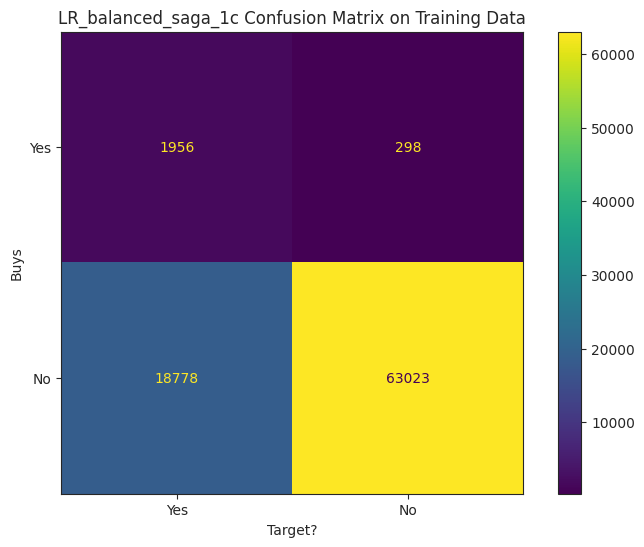

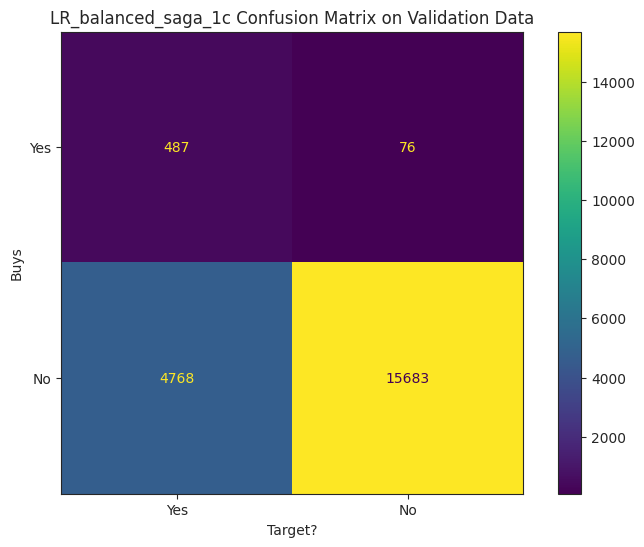

In [ ]:
LR_balanced_saga_1c = regress_log("LR_balanced_saga_1c", X_train=X_train, X_val=X_val, C=0.25, solver='saga', max_iter=1000, class_weight='balanced', warm_start=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Results for LR_balanced_saga_1_l1
   On Training Data:
     Accuracy: % 75.888
     Precision: % 8.918
     Recall: % 86.735
     F4 Score: % 57.315
     F10 Score: % 79.837
   On Validation Data:
     Accuracy: % 75.807
     Precision: % 8.833
     Recall: % 86.146
     F4 Score: % 45.937
     F10 Score: % 79.275

   Generalization Losses:
     Accuracy: % 0.082
     Precision: % 0.085
     Recall: % 0.589
     F4: % 0.449
     F10: % 0.562

   Confusion Matrices

     Training:
[[ 1955   299]
 [19968 61833]]

     Validation:
[[  485    78]
 [ 5006 15445]]


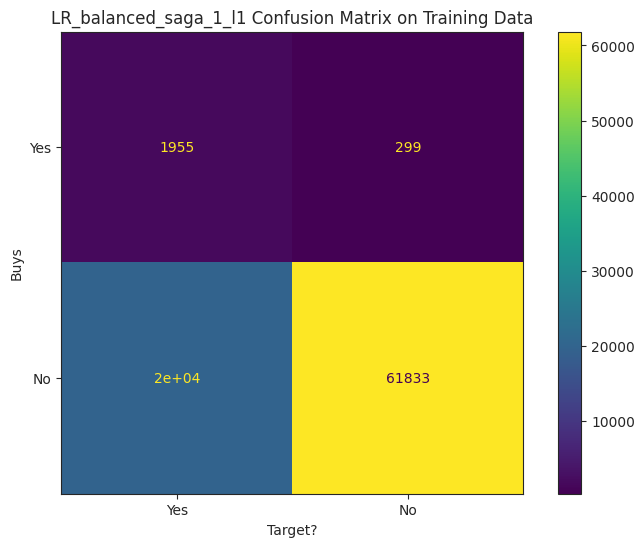

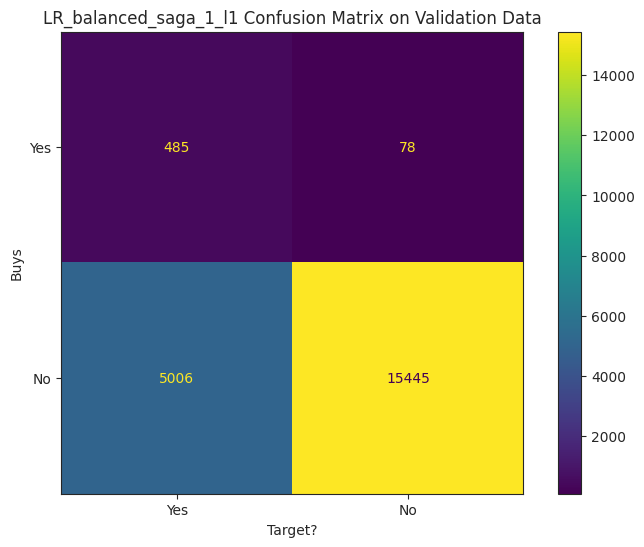

In [ ]:
LR_balanced_saga_1_l1 = regress_log("LR_balanced_saga_1_l1", X_train=X_train, X_val=X_val, penalty='l1', C=0.1, solver='saga', max_iter=1000, class_weight='balanced', warm_start=True)

trying 'sag'

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Results for LR_balanced_sag
   On Training Data:
     Accuracy: % 74.947
     Precision: % 8.45
     Recall: % 84.827
     F4 Score: % 55.381
     F10 Score: % 77.859
   On Validation Data:
     Accuracy: % 74.579
     Precision: % 8.13
     Recall: % 82.416
     F4 Score: % 43.067
     F10 Score: % 75.579

   Generalization Losses:
     Accuracy: % 0.369
     Precision: % 0.319
     Recall: % 2.411
     F4: % 1.775
     F10: % 2.28

   Confusion Matrices

     Training:
[[ 1912   342]
 [20716 61085]]

     Validation:
[[  464    99]
 [ 5243 15208]]


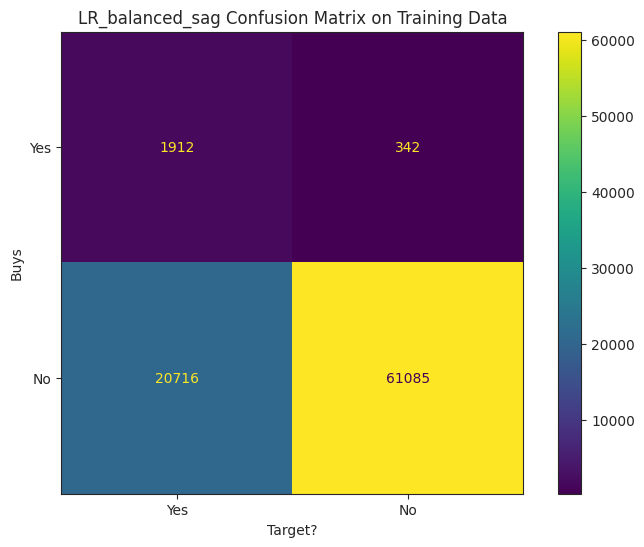

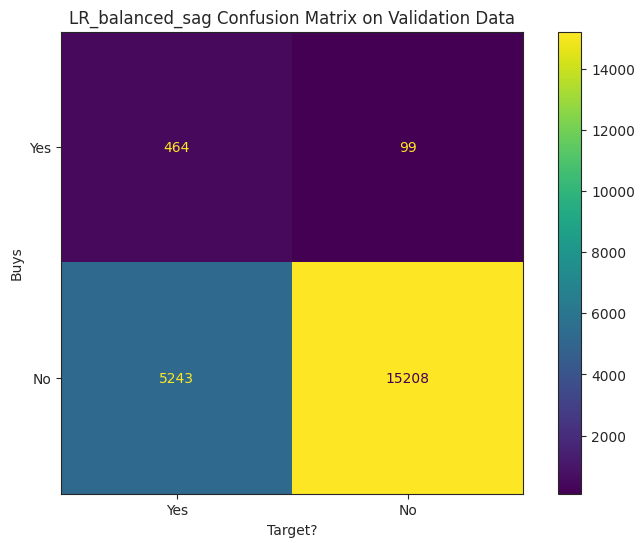

In [ ]:
LR_balanced_sag = regress_log("LR_balanced_sag", X_train=X_train, X_val=X_val, solver='sag', max_iter=1000, class_weight='balanced')

Results for LR_def1_balanced
   On Training Data:
     Accuracy: % 77.346
     Precision: % 9.441
     Recall: % 86.69
     F4 Score: % 58.524
     F10 Score: % 80.194
   On Validation Data:
     Accuracy: % 76.968
     Precision: % 9.243
     Recall: % 86.146
     F4 Score: % 47.023
     F10 Score: % 79.59

   Generalization Losses:
     Accuracy: % 0.378
     Precision: % 0.198
     Recall: % 0.545
     F4: % 0.684
     F10: % 0.604

   Confusion Matrices

     Training:
[[ 1954   300]
 [18742 63059]]

     Validation:
[[  485    78]
 [ 4762 15689]]


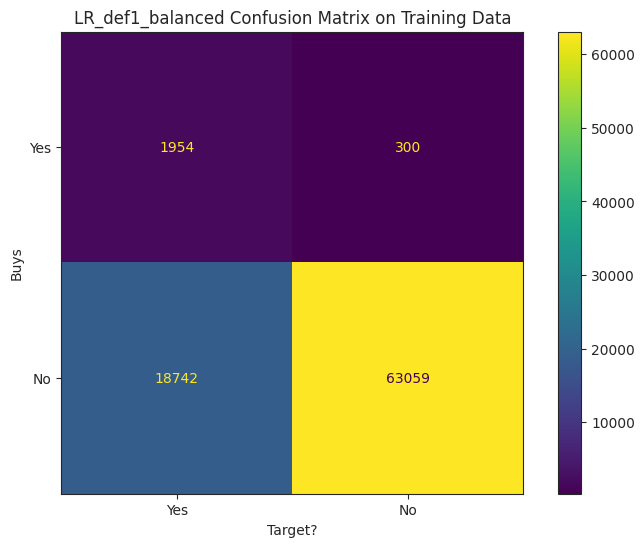

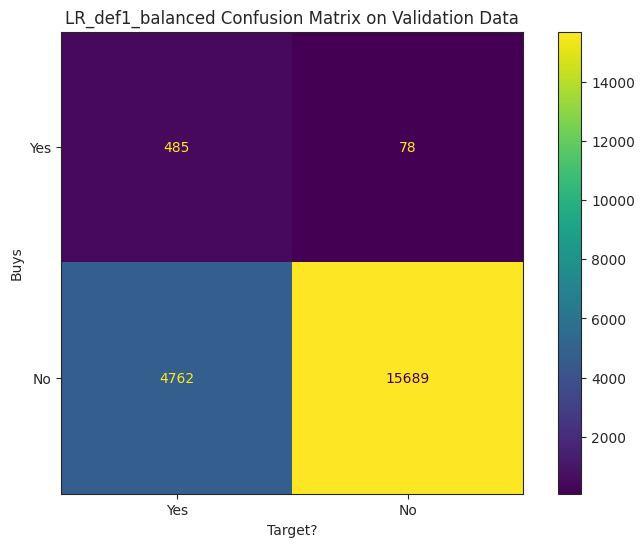

In [ ]:
LR_def1_balanced = regress_log("LR_def1_balanced", X_train=X_train, X_val=X_val, max_iter=1000, class_weight='balanced')

'lbfgs' successfully converges at max_iter=1000

Results for LR_def2_balanced
   On Training Data:
     Accuracy: % 77.346
     Precision: % 9.441
     Recall: % 86.69
     F4 Score: % 58.524
     F10 Score: % 80.194
   On Validation Data:
     Accuracy: % 76.968
     Precision: % 9.243
     Recall: % 86.146
     F4 Score: % 47.023
     F10 Score: % 79.59

   Generalization Losses:
     Accuracy: % 0.378
     Precision: % 0.198
     Recall: % 0.545
     F4: % 0.684
     F10: % 0.604

   Confusion Matrices

     Training:
[[ 1954   300]
 [18742 63059]]

     Validation:
[[  485    78]
 [ 4762 15689]]


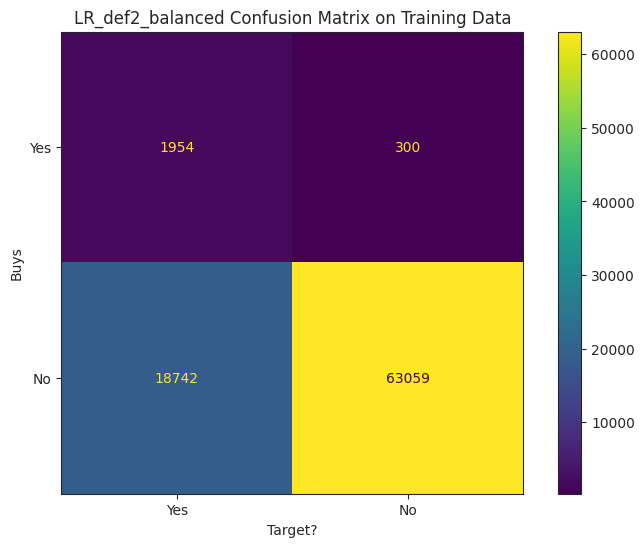

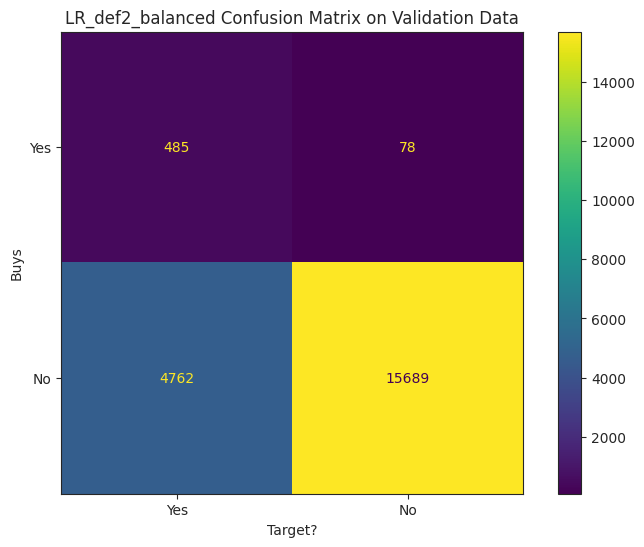

In [ ]:
LR_def2_balanced = regress_log("LR_def2_balanced", X_train=X_train, X_val=X_val, max_iter=500, class_weight='balanced')

successful convergence at 500 iterations

Results for LR_def3_balanced
   On Training Data:
     Accuracy: % 77.346
     Precision: % 9.441
     Recall: % 86.69
     F4 Score: % 58.524
     F10 Score: % 80.194
   On Validation Data:
     Accuracy: % 76.968
     Precision: % 9.243
     Recall: % 86.146
     F4 Score: % 47.023
     F10 Score: % 79.59

   Generalization Losses:
     Accuracy: % 0.378
     Precision: % 0.198
     Recall: % 0.545
     F4: % 0.684
     F10: % 0.604

   Confusion Matrices

     Training:
[[ 1954   300]
 [18742 63059]]

     Validation:
[[  485    78]
 [ 4762 15689]]


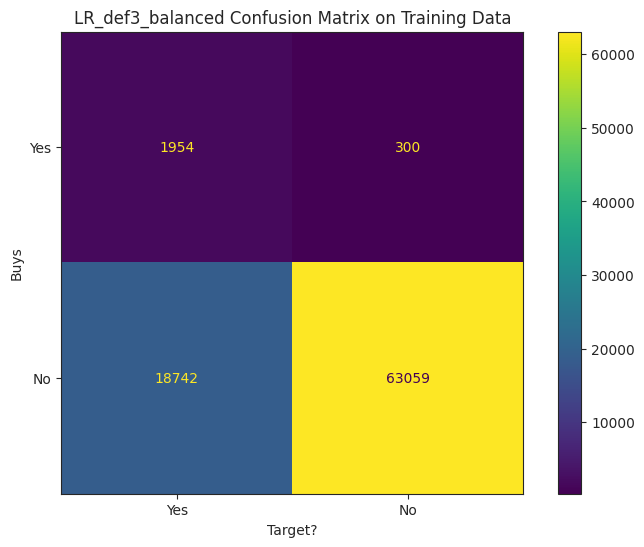

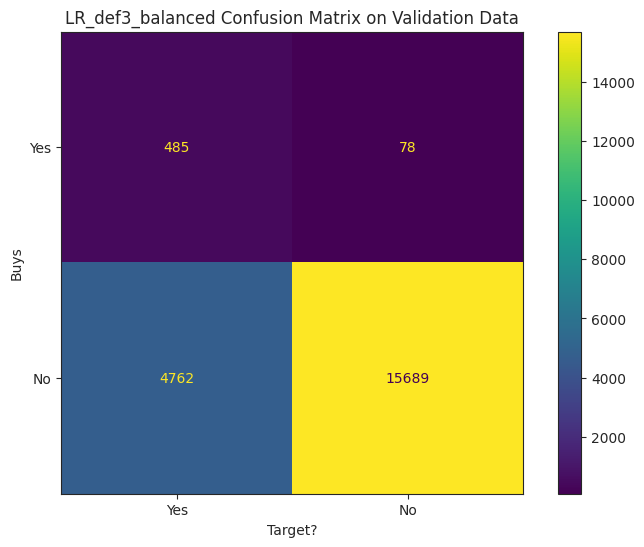

In [ ]:
LR_def3_balanced = regress_log("LR_def3_balanced", X_train=X_train, X_val=X_val, max_iter=250, class_weight='balanced')

successful convergence at 250 iterations

Seeing if defaults are sufficient to converge for the selective featureset X2.

Results for LR2
   On Training Data:
     Accuracy: % 97.786
     Precision: % 83.362
     Recall: % 21.783
     F4 Score: % 22.773
     F10 Score: % 21.944
   On Validation Data:
     Accuracy: % 97.763
     Precision: % 81.208
     Recall: % 21.492
     F4 Score: % 23.198
     F10 Score: % 21.65

   Generalization Losses:
     Accuracy: % 0.023
     Precision: % 2.154
     Recall: % 0.291
     F4: % 0.309
     F10: % 0.294

   Confusion Matrices

     Training:
[[  491  1763]
 [   98 81703]]

     Validation:
[[  121   442]
 [   28 20423]]


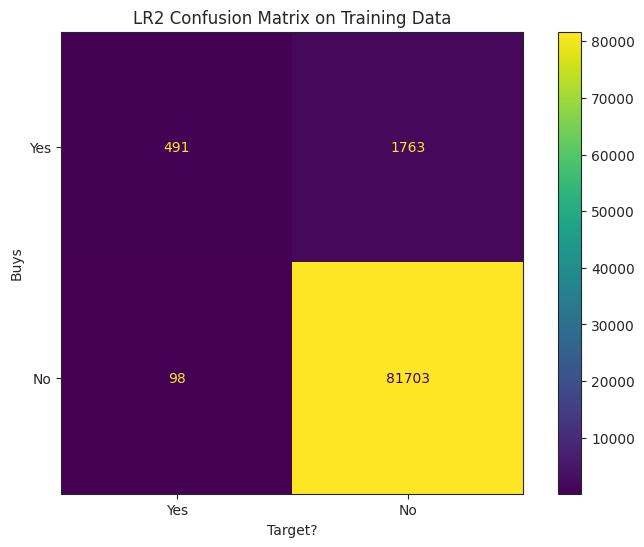

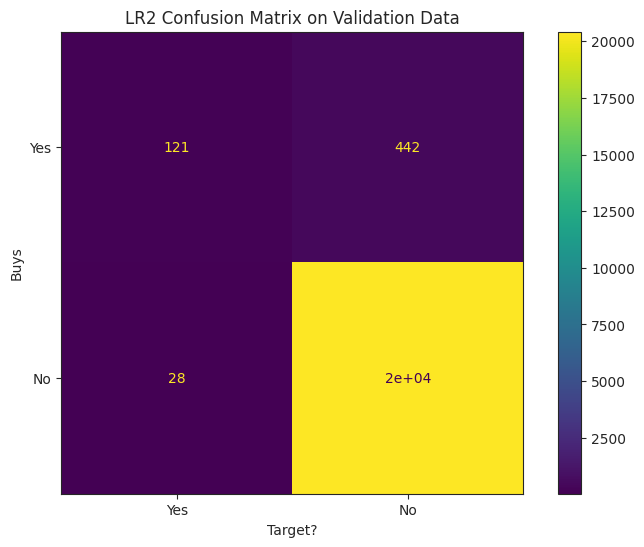

In [ ]:
LR2 = regress_log("LR2")

default settings can converge with X2, and we'll most likely want to use this featureset anyway.

Results for LR2_balanced
   On Training Data:
     Accuracy: % 75.786
     Precision: % 8.823
     Recall: % 86.025
     F4 Score: % 56.793
     F10 Score: % 79.166
   On Validation Data:
     Accuracy: % 75.507
     Precision: % 8.688
     Recall: % 85.613
     F4 Score: % 45.407
     F10 Score: % 78.712

   Generalization Losses:
     Accuracy: % 0.279
     Precision: % 0.135
     Recall: % 0.412
     F4: % 0.5
     F10: % 0.454

   Confusion Matrices

     Training:
[[ 1939   315]
 [20038 61763]]

     Validation:
[[  482    81]
 [ 5066 15385]]


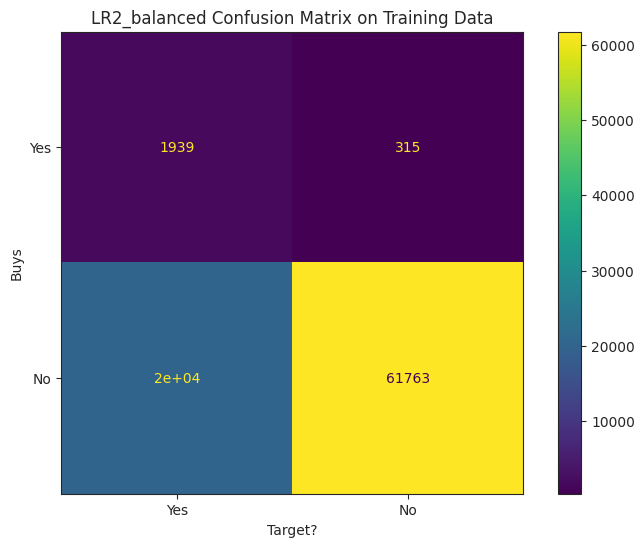

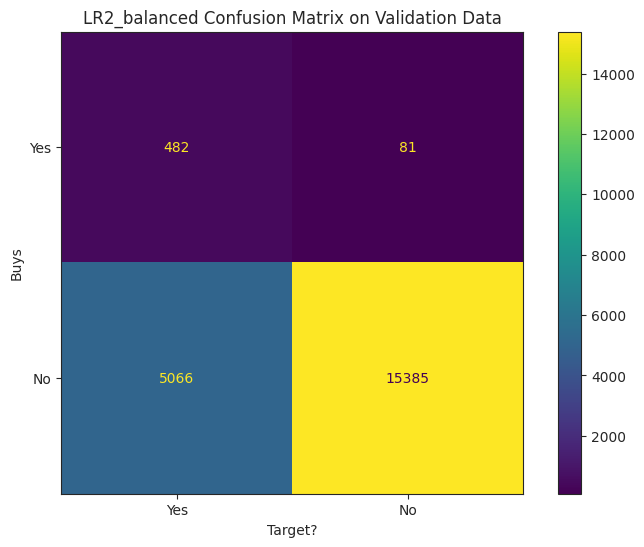

In [ ]:
LR2_balanced = regress_log("LR2_balanced", class_weight='balanced')

LR_l1: experimenting with different penalties

reminder: L1 regularization uses the absolute value of the coefficient as a penalty term. L2 uses the squared magnitude of the coefficient as a penalty term. L2 encourages greater simplicity in the model, while L1 is more helpful in feature selection.

Results for LR_l1
   On Training Data:
     Accuracy: % 75.785
     Precision: % 8.822
     Recall: % 86.025
     F4 Score: % 56.792
     F10 Score: % 79.166
   On Validation Data:
     Accuracy: % 75.507
     Precision: % 8.688
     Recall: % 85.613
     F4 Score: % 45.407
     F10 Score: % 78.712

   Generalization Losses:
     Accuracy: % 0.278
     Precision: % 0.135
     Recall: % 0.412
     F4: % 0.499
     F10: % 0.454

   Confusion Matrices

     Training:
[[ 1939   315]
 [20039 61762]]

     Validation:
[[  482    81]
 [ 5066 15385]]


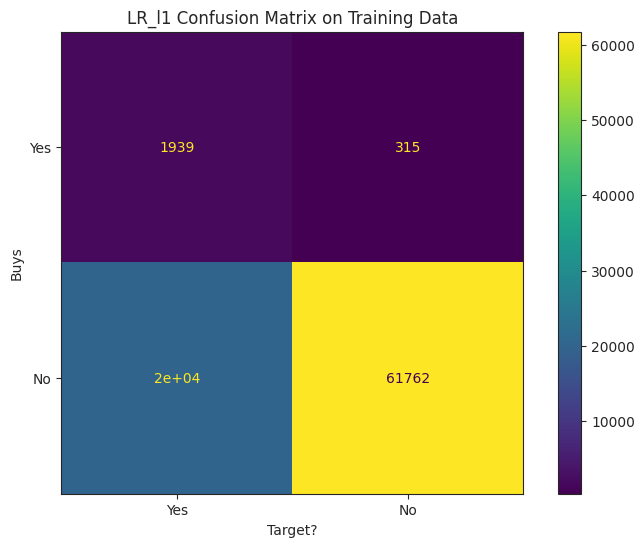

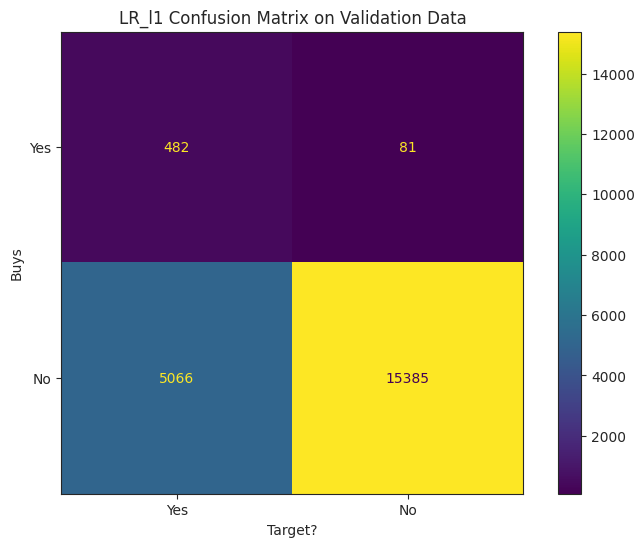

In [ ]:
LR_l1 = regress_log("LR_l1", penalty='l1', class_weight='balanced', solver='saga')

elasticnet penalty

Results for LR_elastic
   On Training Data:
     Accuracy: % 75.785
     Precision: % 8.822
     Recall: % 86.025
     F4 Score: % 56.792
     F10 Score: % 79.166
   On Validation Data:
     Accuracy: % 75.507
     Precision: % 8.688
     Recall: % 85.613
     F4 Score: % 45.407
     F10 Score: % 78.712

   Generalization Losses:
     Accuracy: % 0.278
     Precision: % 0.135
     Recall: % 0.412
     F4: % 0.499
     F10: % 0.454

   Confusion Matrices

     Training:
[[ 1939   315]
 [20039 61762]]

     Validation:
[[  482    81]
 [ 5066 15385]]


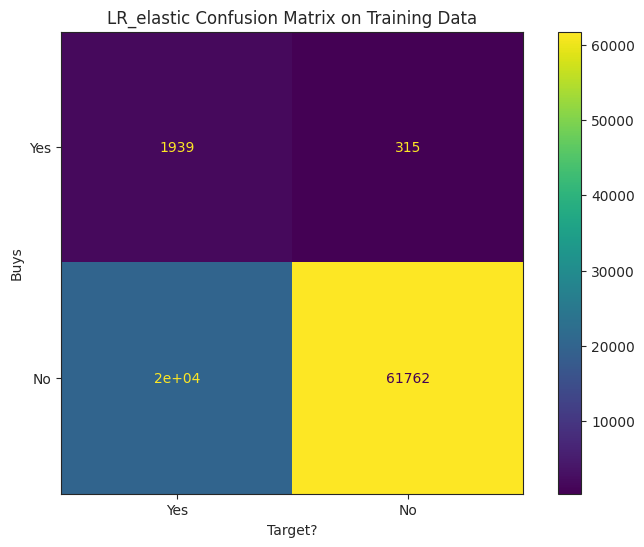

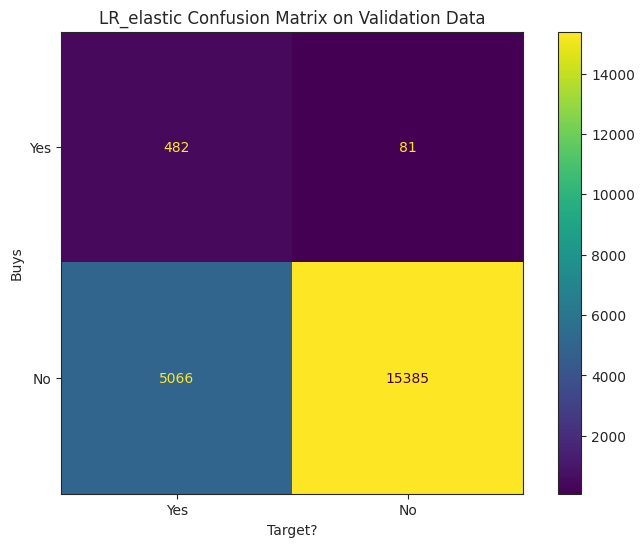

In [ ]:
LR_elastic = regress_log("LR_elastic", penalty='elasticnet', class_weight='balanced', solver='saga', l1_ratio=0.5)

Taking LR2_balanced params and tuning C

Results for LR3
   On Training Data:
     Accuracy: % 75.787
     Precision: % 8.823
     Recall: % 86.025
     F4 Score: % 56.794
     F10 Score: % 79.167
   On Validation Data:
     Accuracy: % 75.507
     Precision: % 8.688
     Recall: % 85.613
     F4 Score: % 45.407
     F10 Score: % 78.712

   Generalization Losses:
     Accuracy: % 0.28
     Precision: % 0.135
     Recall: % 0.412
     F4: % 0.501
     F10: % 0.454

   Confusion Matrices

     Training:
[[ 1939   315]
 [20037 61764]]

     Validation:
[[  482    81]
 [ 5066 15385]]


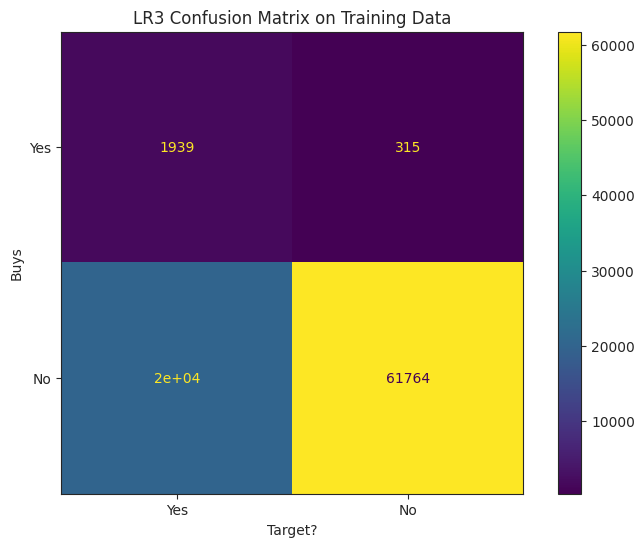

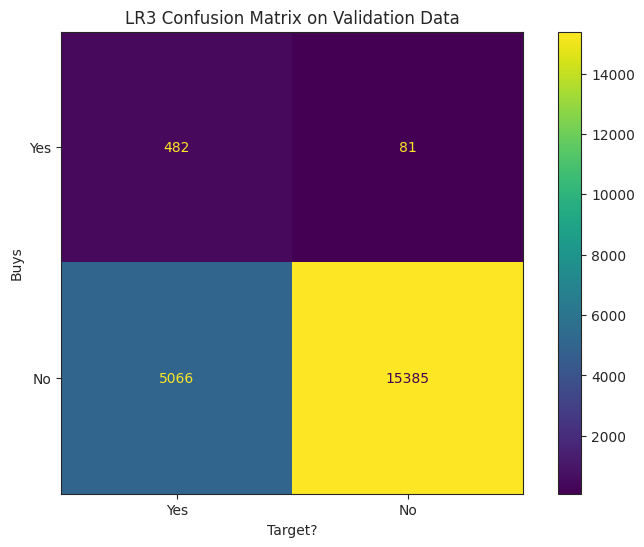

In [ ]:
LR3 = regress_log("LR3", C=2.0, class_weight='balanced')

Results for LR3a
   On Training Data:
     Accuracy: % 75.786
     Precision: % 8.823
     Recall: % 86.025
     F4 Score: % 56.793
     F10 Score: % 79.166
   On Validation Data:
     Accuracy: % 75.507
     Precision: % 8.688
     Recall: % 85.613
     F4 Score: % 45.407
     F10 Score: % 78.712

   Generalization Losses:
     Accuracy: % 0.279
     Precision: % 0.135
     Recall: % 0.412
     F4: % 0.5
     F10: % 0.454

   Confusion Matrices

     Training:
[[ 1939   315]
 [20038 61763]]

     Validation:
[[  482    81]
 [ 5066 15385]]


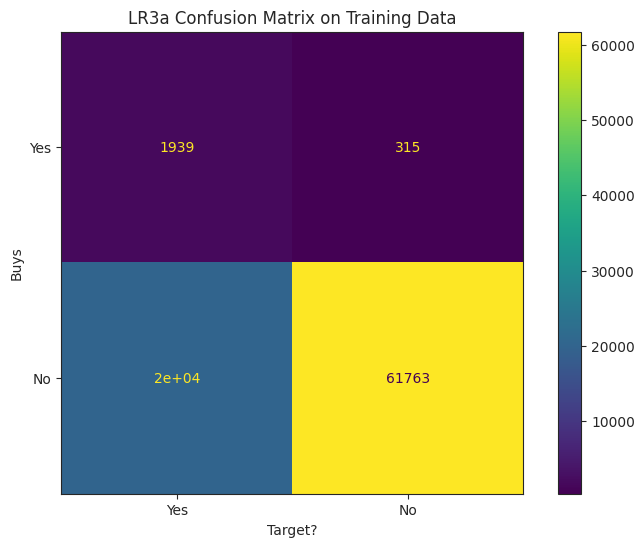

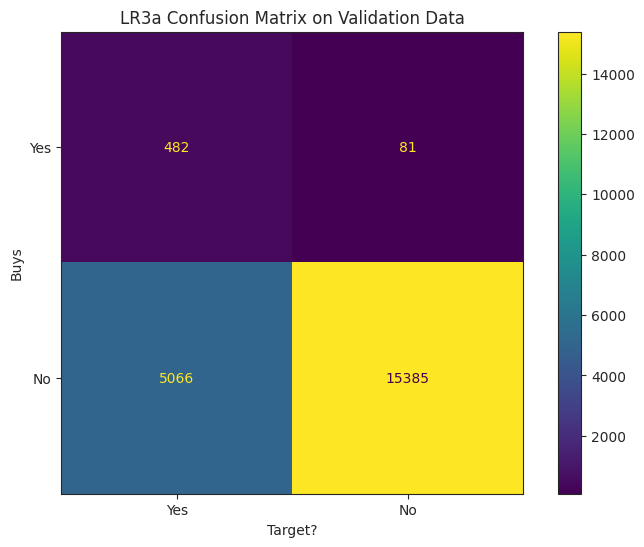

In [ ]:
LR3a = regress_log("LR3a", C=0.5, class_weight='balanced')

seeing if C has an effect when using comprehensive featureset X

### 9. Assess Model Performance

In [ ]:
val_FNs = []
val_FPs = []

for cm in cm_val_list:
  val_FNs.append(cm[0][1])
  val_FPs.append(cm[1][0])

- class weights missing one entry
- f2 losses and f3 losses lists are empty

In [ ]:
LR_eval = pd.DataFrame({
    'Model': model_names_list,
    'Class Weight': weights,
    'C': C_list,
    'Penalty': penalties,
    'Solver': solvers,
    'Train Accuracy': training_accuracy_list,
    'Train Precision': training_precision_list,
    'Train Recall': training_recall_list,
    'Train F4': training_f4_list,
    'Train F10': training_f10_list,
    'Validation FNs': val_FNs,
    'Validation FPs': val_FPs,
    'Validation Accuracy': validation_accuracy_list,
    'Validation Precision': validation_precision_list,
    'Validation Recall': validation_recall_list,
    'Validation F4': validation_f4_list,
    'Validation F10': validation_f10_list,
    'Accuracy Generalization Loss': accuracy_losses_list,
    'Precision Generalization Loss': precision_losses_list,
    'Recall Generalization Loss': recall_losses_list,
    'F4 Generalization Loss': f4_losses_list,
    'F10 Generalization Loss': f10_losses_list
})

LR_eval.fillna("None", inplace=True)

In [ ]:
LRs_by_recall = LR_eval.sort_values('Validation Recall', ascending=False)
LRs_by_F4 = LR_eval.sort_values('Validation F4', ascending=False)
LRs_by_F10 = LR_eval.sort_values('Validation F10', ascending=False)
LRs_by_precision = LR_eval.sort_values('Validation Precision', ascending=False)

In [ ]:
LRs_by_recall

,Model,Class Weight,C,Penalty,Solver,Train Accuracy,Train Precision,Train Recall,Train F4,Train F10,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
24,LR_balanced_saga_1,balanced,0.1,l2,saga,0.772304,0.094247,0.870009,0.586186,0.804449,...,0.768630,0.092512,0.866785,0.580830,0.800455,0.003673,0.001735,0.003224,0.005356,0.003994
23,LR_balanced_saga_M,balanced,0.1,l2,saga,0.772304,0.094247,0.870009,0.586186,0.804449,...,0.768630,0.092512,0.866785,0.580830,0.800455,0.003673,0.001735,0.003224,0.005356,0.003994
4,LR_balanced_saga,balanced,1.0,l2,saga,0.765511,0.092035,0.873558,0.582565,0.805810,...,0.762872,0.090437,0.866785,0.575951,0.798885,0.002638,0.001598,0.006773,0.006614,0.006925
18,LR_def1,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
21,LR_def3_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
5,LR_def1,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
20,LR_def1_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
19,LR_def2_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
12,LR_balanced_saga_CCL,balanced,1.0,l2,saga,0.767759,0.092202,0.866016,0.579785,0.799575,...,0.763586,0.089927,0.857904,0.571041,0.791020,0.004173,0.002274,0.008112,0.008744,0.008555
9,LR_elastic,balanced,1.0,elasticnet,saga,0.757849,0.088225,0.860248,0.567916,0.791659,...,0.755068,0.086878,0.856128,0.562929,0.787123,0.002781,0.001346,0.004121,0.004987,0.004536


In [ ]:
LRs_by_F4

,Model,Class Weight,C,Penalty,Solver,Train Accuracy,Train Precision,Train Recall,Train F4,Train F10,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
24,LR_balanced_saga_1,balanced,0.1,l2,saga,0.772304,0.094247,0.870009,0.586186,0.804449,...,0.768630,0.092512,0.866785,0.580830,0.800455,0.003673,0.001735,0.003224,0.005356,0.003994
23,LR_balanced_saga_M,balanced,0.1,l2,saga,0.772304,0.094247,0.870009,0.586186,0.804449,...,0.768630,0.092512,0.866785,0.580830,0.800455,0.003673,0.001735,0.003224,0.005356,0.003994
21,LR_def3_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
5,LR_def1,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
20,LR_def1_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
19,LR_def2_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
18,LR_def1,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
15,LR_balanced_saga_M,balanced,1.0,l2,saga,0.779716,0.096196,0.859361,0.585925,0.796775,...,0.775959,0.094025,0.852575,0.578190,0.789512,0.003757,0.002170,0.006786,0.007735,0.007263
4,LR_balanced_saga,balanced,1.0,l2,saga,0.765511,0.092035,0.873558,0.582565,0.805810,...,0.762872,0.090437,0.866785,0.575951,0.798885,0.002638,0.001598,0.006773,0.006614,0.006925
12,LR_balanced_saga_CCL,balanced,1.0,l2,saga,0.767759,0.092202,0.866016,0.579785,0.799575,...,0.763586,0.089927,0.857904,0.571041,0.791020,0.004173,0.002274,0.008112,0.008744,0.008555


In [ ]:
LRs_by_F10

,Model,Class Weight,C,Penalty,Solver,Train Accuracy,Train Precision,Train Recall,Train F4,Train F10,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
24,LR_balanced_saga_1,balanced,0.1,l2,saga,0.772304,0.094247,0.870009,0.586186,0.804449,...,0.768630,0.092512,0.866785,0.580830,0.800455,0.003673,0.001735,0.003224,0.005356,0.003994
23,LR_balanced_saga_M,balanced,0.1,l2,saga,0.772304,0.094247,0.870009,0.586186,0.804449,...,0.768630,0.092512,0.866785,0.580830,0.800455,0.003673,0.001735,0.003224,0.005356,0.003994
4,LR_balanced_saga,balanced,1.0,l2,saga,0.765511,0.092035,0.873558,0.582565,0.805810,...,0.762872,0.090437,0.866785,0.575951,0.798885,0.002638,0.001598,0.006773,0.006614,0.006925
18,LR_def1,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
21,LR_def3_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
5,LR_def1,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
20,LR_def1_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
19,LR_def2_balanced,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
12,LR_balanced_saga_CCL,balanced,1.0,l2,saga,0.767759,0.092202,0.866016,0.579785,0.799575,...,0.763586,0.089927,0.857904,0.571041,0.791020,0.004173,0.002274,0.008112,0.008744,0.008555
15,LR_balanced_saga_M,balanced,1.0,l2,saga,0.779716,0.096196,0.859361,0.585925,0.796775,...,0.775959,0.094025,0.852575,0.578190,0.789512,0.003757,0.002170,0.006786,0.007735,0.007263


In [ ]:
LRs_by_precision

,Model,Class Weight,C,Penalty,Solver,Train Accuracy,Train Precision,Train Recall,Train F4,Train F10,...,Validation Accuracy,Validation Precision,Validation Recall,Validation F4,Validation F10,Accuracy Generalization Loss,Precision Generalization Loss,Recall Generalization Loss,F4 Generalization Loss,F10 Generalization Loss
6,LR2,None,1.0,l2,lbfgs,0.977860,0.833616,0.217835,0.227730,0.219440,...,0.977634,0.812081,0.214920,0.224637,0.216496,0.000226,0.021536,0.002915,0.003093,0.002944
1,LR_def,None,1.0,l2,lbfgs,0.978038,0.849315,0.220053,0.230081,0.221679,...,0.977444,0.811189,0.206039,0.215496,0.207572,0.000595,0.038126,0.014014,0.014585,0.014107
2,LR_def1,None,1.0,l2,lbfgs,0.978014,0.848797,0.219166,0.229166,0.220787,...,0.977396,0.805556,0.206039,0.215472,0.207569,0.000618,0.043242,0.013127,0.013694,0.013219
3,LR_saga,None,1.0,l2,saga,0.978026,0.849057,0.219610,0.229623,0.221233,...,0.977396,0.805556,0.206039,0.215472,0.207569,0.000630,0.043501,0.013571,0.014151,0.013665
5,LR_def1,balanced,1.0,l2,lbfgs,0.773458,0.094414,0.866903,0.585236,0.801939,...,0.769677,0.092434,0.861456,0.578394,0.795896,0.003780,0.001981,0.005447,0.006843,0.006043
4,LR_balanced_saga,balanced,1.0,l2,saga,0.765511,0.092035,0.873558,0.582565,0.805810,...,0.762872,0.090437,0.866785,0.575951,0.798885,0.002638,0.001598,0.006773,0.006614,0.006925
7,LR2_balanced,balanced,1.0,l2,lbfgs,0.757861,0.088229,0.860248,0.567926,0.791662,...,0.755068,0.086878,0.856128,0.562929,0.787123,0.002793,0.001350,0.004121,0.004997,0.004539
8,LR_l1,balanced,1.0,l1,saga,0.757849,0.088225,0.860248,0.567916,0.791659,...,0.755068,0.086878,0.856128,0.562929,0.787123,0.002781,0.001346,0.004121,0.004987,0.004536
9,LR_elastic,balanced,1.0,elasticnet,saga,0.757849,0.088225,0.860248,0.567916,0.791659,...,0.755068,0.086878,0.856128,0.562929,0.787123,0.002781,0.001346,0.004121,0.004987,0.004536
10,LR3,balanced,2.0,l2,lbfgs,0.757873,0.088233,0.860248,0.567936,0.791665,...,0.755068,0.086878,0.856128,0.562929,0.787123,0.002805,0.001354,0.004121,0.005007,0.004542


In [ ]:
LRs_by_recall.to_csv("DTs_by_recall")
LRs_by_precision.to_csv("DTs_by_precision")
LRs_by_F4.to_csv("DTs_by_F4")
LRs_by_F10.to_csv("DTs_by_F10")

Testing Phase

In [ ]:
# test metrics
tested_models = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f4_list = []
test_f10_list = []
accuracy_generalization = []
precision_generalization = []
recall_generalization = []
f4_generalizatin = []
f10_generalization = []
test_cms = []

Testing tree2a

In [ ]:
results_tree2a

NameError: name 'results_tree2a' is not defined

In [ ]:
accuracy_generalization_tree2a

In [ ]:
results_tree2a = DT_eval.loc[DT_eval['Model'] == "tree2a"][[
    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F4', 'Train F10',
    'Validation Accuracy', 'Validation Precision', 'Validation Recall', 'Validation F4', 'Validation F10']]

preds_tree2a_test = tree2a.predict(X2_test)
accuracy_tree2a_test = accuracy_score(y_test, preds_tree2a_test)
precision_tree2a_test = precision_score(y_test, preds_tree2a_test)
recall_tree2a_test = recall_score(y_test, preds_tree2a_test)
f4_tree2a_test = fbeta_score(y_test, preds_tree2a_test, beta=4)
f10_tree2a_test = fbeta_score(y_test, preds_tree2a_test, beta=10)
cm_tree2a_test = confusion_matrix(y_test, preds_tree2a_test)

# generalization comparison
accuracy_generalization_tree2a = (results_tree2a['Train Accuracy'].iloc[0] - accuracy_tree2a_test) * -1
precision_generalization_tree2a = (results_tree2a['Train Precision'].iloc[0] - precision_tree2a_test) * -1
recall_generalization_tree2a = (results_tree2a['Train Recall'].iloc[0] - recall_tree2a_test) * -1
F4_generalization_tree2a = (results_tree2a['Train F4'].iloc[0] - f4_tree2a_test) * -1
F10_generalization_tree2a = (results_tree2a['Train F10'].iloc[0] - f10_tree2a_test) * -1

# appending info to lists
tested_models.append("tree2a")
test_accuracy_list.append(accuracy_tree2a_test)
test_precision_list.append(precision_tree2a_test)
test_recall_list.append(recall_tree2a_test)
test_f4_list.append(f4_tree2a_test)
test_f10_list.append(f10_tree2a_test)
test_cms.append(cm_tree2a_test)

# print results
print("Test Results for tree2a")
print("     Accuracy: ", accuracy_tree2a_test)
print("     Precision: ", precision_tree2a_test)
print("     Recall: ", recall_tree2a_test)
print("     F4: ", f4_tree2a_test)
print("     F10: ", f10_tree2a_test)
print("")
print("Confusion matrix")
print(cm_tree2a_test)
print("")
print("Error generalization")
print("     Accuracy: ", accuracy_generalization_tree2a)
print("     Precision: ", precision_generalization_tree2a)
print("     Recall: ", recall_generalization_tree2a)
print("     F4 Score: ", F4_generalization_tree2a)
print("     F10 Score: ", F10_generalization_tree2a)
print("")
# raw numbers
cm_fig_tree2a_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree2a_test, labels=[1, 0])
cm_fig_tree2a_raw.ax_.set_xlabel("Target?")
cm_fig_tree2a_raw.ax_.set_ylabel("Buys")
cm_fig_tree2a_raw.ax_.set_xticklabels(["Yes", "No"])
cm_fig_tree2a_raw.ax_.set_yticklabels(["Yes", "No"])
cm_fig_tree2a_raw.ax_.set_title("Tree2A's Test Confusion Matrix in raw numbers")
plt.show()

normalized over true classes

In [ ]:
cm_fig_tree2a_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree2a_test, normalize='true', labels=[1, 0])
cm_fig_tree2a_true.ax_.set_xlabel("Target?")
cm_fig_tree2a_true.ax_.set_ylabel("Buys")
cm_fig_tree2a_true.ax_.set_xticklabels(["Yes", "No"])
cm_fig_tree2a_true.ax_.set_yticklabels(["Yes", "No"])
cm_fig_tree2a_true.ax_.set_title("Tree2A's Test Confusion Matrix as Decimals of True Classes")
plt.show()

normalized over predictions

In [ ]:
cm_fig_tree2a_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree2a_test, normalize='pred', labels=[1, 0])
configure_CM(cm_fig_tree2a_pred, "Tree2A's Test Confusion Matrix Normalized over Predictions")
plt.show()

Testing tree_recall_opt

In [ ]:
results_tree_recall_opt = DT_eval.loc[DT_eval['Model'] == "tree_recall_opt"][[
    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F4', 'Train F10',
    'Validation Accuracy', 'Validation Precision', 'Validation Recall', 'Validation F4', 'Validation F10']]

preds_tree_recall_opt_test = tree_recall_opt.predict(X2_test)
accuracy_tree_recall_opt_test = accuracy_score(y_test, preds_tree_recall_opt_test)
precision_tree_recall_opt_test = precision_score(y_test, preds_tree_recall_opt_test)
recall_tree_recall_opt_test = recall_score(y_test, preds_tree_recall_opt_test)
f4_tree_recall_opt_test = fbeta_score(y_test, preds_tree_recall_opt_test, beta=4)
f10_tree_recall_opt_test = fbeta_score(y_test, preds_tree_recall_opt_test, beta=10)
cm_tree_recall_opt_test = confusion_matrix(y_test, preds_tree_recall_opt_test)

# generalization comparison
accuracy_generalization_tree_recall_opt = (results_tree_recall_opt['Train Accuracy'].iloc[0] - accuracy_tree_recall_opt_test) * -1
precision_generalization_tree_recall_opt = (results_tree_recall_opt['Train Precision'].iloc[0] - precision_tree_recall_opt_test) * -1
recall_generalization_tree_recall_opt = (results_tree_recall_opt['Train Recall'].iloc[0] - recall_tree_recall_opt_test) * -1
F4_generalization_tree_recall_opt = (results_tree_recall_opt['Train F4'].iloc[0] - f4_tree_recall_opt_test) * -1
F10_generalization_tree_recall_opt = (results_tree_recall_opt['Train F10'].iloc[0] - f10_tree_recall_opt_test) * -1

# appending info to lists
tested_models.append("tree_recall_opt")
test_accuracy_list.append(accuracy_tree_recall_opt_test)
test_precision_list.append(precision_tree_recall_opt_test)
test_recall_list.append(recall_tree_recall_opt_test)
test_f4_list.append(f4_tree_recall_opt_test)
test_f10_list.append(f10_tree_recall_opt_test)
test_cms.append(cm_tree_recall_opt_test)

# print results
print("Test Results for tree_recall_opt")
print("     Accuracy: ", accuracy_tree_recall_opt_test)
print("     Precision: ", precision_tree_recall_opt_test)
print("     Recall: ", recall_tree_recall_opt_test)
print("     F4: ", f4_tree_recall_opt_test)
print("     F10: ", f10_tree_recall_opt_test)
print("")
print("Confusion matrix")
print(cm_tree_recall_opt_test)
print("")
print("Error generalization")
print("     Accuracy: ", accuracy_generalization_tree_recall_opt)
print("     Precision: ", precision_generalization_tree_recall_opt)
print("     Recall: ", recall_generalization_tree_recall_opt)
print("     F4 Score: ", F4_generalization_tree_recall_opt)
print("     F10 Score: ", F10_generalization_tree_recall_opt)
print("")

raw numbers

In [ ]:
cm_fig_tree_recall_opt_raw = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree_recall_opt_test, labels=[1, 0])
configure_CM(cm_fig_tree_recall_opt_raw, "Tree_recall_opt's Test Confusion Matrix in raw numbers")
plt.show()

normalized over actuals

In [ ]:
cm_fig_tree_recall_opt_true = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree_recall_opt_test, normalize='true', labels=[1, 0])
configure_CM(cm_fig_tree_recall_opt_true, "Tree_recall_opt's Test Confusion Matrix normalized over true classes")
plt.show()

normalized over predictions

In [ ]:
cm_fig_tree_recall_opt_pred = ConfusionMatrixDisplay.from_predictions(y_test, preds_tree_recall_opt_test, normalize='pred', labels=[1, 0])
configure_CM(cm_fig_tree_recall_opt_pred, "Tree_recall_opt's Test Confusion Matrix normalized over predictions")
plt.show()